# Detección de fraude en reclamación de seguros

## Justificación del análisis de data

Teniendo en cuenta que el objetivo de este proyecto es la construcción de un modelo de machine learning que sea capaz de clasificar, y por añadidura encontrar a priori, los casos de fraude que se cometen en las reclamaciones de seguros; es necesario un dataset que contenga información acerca de los fraudes que se cometieron en una compañía de seguros, los cuales hayan sido documentados junto a algunas características de sus clientes y del caso particular sobre el cual se cometió el fraude, para con ello poder alimentar y entrenar el modelo de machine learning.

Dado que a esta información solamente tienen acceso pocas personas en Colombia, como las áreas de la compañías de seguros encargadas de la vigilancia y reporte de casos de fraude y dado el caracter de confidencialidad de esta información, se tendrá que usar un dataset Estadounidense proveído en un reto de Kaggle; el cual contiene 1000 registros de reclamaciones del seguro, sus características, así como una variable label donde nos informa del incurrimiento de fraude o no por parte del cliente. Las entradas de este dataset fueron tomadas desde el 01 de enero de 2015 hasta 01 de marzo del 2015, es decir, corresponde a 2 meses de información.

Como se verá más adelante, en el analisis de la variable fraud_reported de este dataset, son más frecuentes los casos en los que no se comete fraude comparados contra los que si, haciendo más difícil encontrar patrones que nos lleven a una clusterización de los casos fraudulentos más generalizada, dado el bajo numero de entradas que tenemos con estas caracteristicas. Este tipo de problemas y en general el problema de clasificación de fraude, se les conoce como problema de imbalance data, donde un tipos de datos ocurren más frecuentemente comparado con otros. La descripción y el entendimiento adecuado de los datos se hace crucial entonces, pues mediante este se podrá determinar qué variables deben incluirse o no dentro de la construcción del modelo, para que este a su vez haga un mejor trabajo en la clasificación.


### Importar las librerias para análisis de data

In [1]:
import numpy as np      ## sirve para manipular arrays
import pandas as pd     ## sirve para manipular dataframes
import matplotlib.pyplot as plt     ## sirve para realizar plots
import seaborn as sns               ## sirve para realizar plots
from itertools import combinations

### Carga y visualizacion del dataset

In [2]:
## Cargar el dataset del archivo CSV a un dataframe

insurance_claims = pd.read_csv('Dataset/insurance_claims.csv')

In [3]:
## Mostrar la cabecera del dataframe para comprobar si cargó correctamente la informacion

insurance_claims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Como se observa, el dataset de reclamaciones cuenta con 39 variables entre cualitativas y cuantitativas que describen las características que tiene una póliza, las del incidente que llevó a la reclamación y del cliente que la adquirió dicha póliza. Esta información recolecta del cliente como meses de vinculación, edad, el género, la ocupación, los hobbies, la relación con el beneficiario; por parte de las caracteristicas del incidente contiene información como año del auto, la existencia reporte policial, el daño a propiedad, cantidad de testigos presentes, numero de lesionados, entre otras; y las caracteristicas de la póliza información como número de la misma, fecha de vinculación, estado donde la adquirió, prima de la póliza entre otras.

In [4]:
## Se eliminan las variables insured_zip, policy_number, incident_date, incident_location, auto_model, policy_bind_date, capital-gains, capital-loss, policy_csl dado que no aportan informacion relevante al proposito del proyecto

insurance_claims = insurance_claims.drop(['insured_zip', 'policy_number', 'incident_date', 'incident_location', 'auto_model', 'policy_bind_date', 'capital-gains', 'capital-loss', 'policy_csl'], axis = 1)

Como el objetivo de nuestro proyecto, mencionado anteriormente, es la clasificación de casos fraudulentos y la generalización de los resultados en datos no observados, es preciso eliminar variables que no aportarán en la consecución de este objetivo como lo son insured zip pues este varía de cliente a cliente dado que se encuentra atado a la residencia de los mismos, además que podría generar problemas de discriminación por parte del modelo, se elimina la variable policy_number pues es única por cliente, incident_location ya que esta se asocia a la ubicación donde ocurre el siniestro y por lógica no debería tener incidencia o correlación dentro de la incurrencia en fraude, y las variables auto_model y policy_bind_date pues su información es redundante con las variables auto_make y months_as_customer respectivamente.

In [5]:
## Revisar el tamaño del dataset

insurance_claims.shape

(1000, 30)

Como podemos observar en la parte superior, después de eliminar las variables anteriormente mencionadas, nuestro dataset queda compuesto por 29 variables o features, una variable label y 1000 registros.

In [6]:
## Obtener el tipo de dato de cada variable y la totalidad de las entradas

insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

Se revisa que tipo de variable corresponde cada una, y observamos que el dataset se compone de 1 variable tipo flotante, 15 variables tipo entero, y 17 variables tipo objeto

In [7]:
## revisar si existen datos faltantes dentro del dataframe

insurance_claims.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_year                      0
fraud_reported                 0
dtype: int

como se observa parece que no existen variables que tengan algún registro faltante, sin embargo, como se verá más adelante las variables property_damage, police_report_available, collision_type se ha anotado el simbolo ? para llenar los espacios correspondientes a los datos faltantes, esto se visualizará en nuestro análisis de data, pero será modificado en el momento de la construcción del modelo.

# Análisis estadístico de los datos

In [8]:
## resumen estadístico general de las variables numéricas
insurance_claims.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Analisis univariado

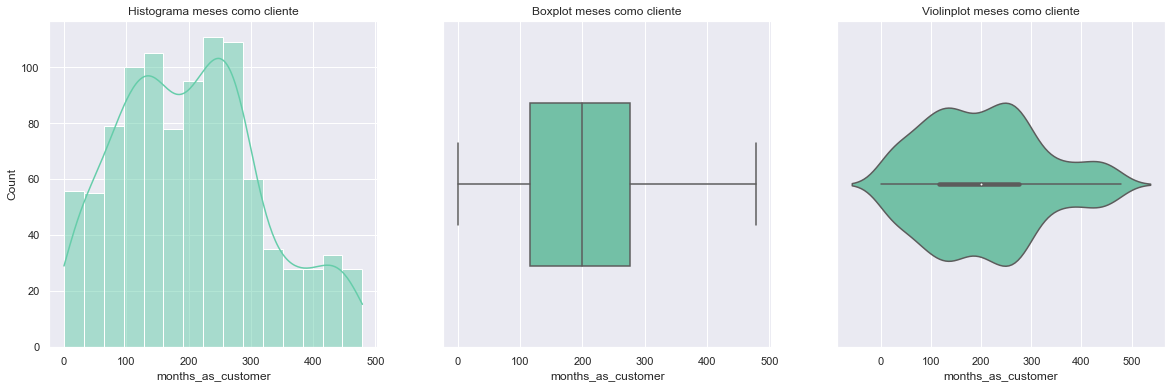

,months_as_customer
count,1000.000000
mean,203.954000
std,115.113174
min,0.000000
25%,115.750000
50%,199.500000
75%,276.250000
max,479.000000


In [9]:
## Distribución de meses como cliente

# Para agregar graficas frente a otras, se utiliza la funcion subplot de plt
# plt.subplot(# de filas deseadas, # de columnas deseadas, grafica No.)
sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(insurance_claims['months_as_customer'], color = 'mediumaquamarine', kde = True)
plt.title('Histograma meses como cliente')

plt.subplot(1,3,2)
sns.boxplot(x = insurance_claims['months_as_customer'], width = 0.5, fliersize = 4,  color = 'mediumaquamarine')
plt.title('Boxplot meses como cliente')

plt.subplot(1,3,3)
sns.violinplot(x = insurance_claims['months_as_customer'], width = 0.5, color = 'mediumaquamarine')
plt.title('Violinplot meses como cliente')

plt.show()

insurance_claims['months_as_customer'].describe().to_frame()

La primera variable a analizar es months_as_customer o meses como cliente. Esta se Refiriere a los meses que lleva una persona asegurada al momento de la ocurrencia del siniestro. Se observa que esta variable varía entre los 0 a 479 meses, con una mediana de 199 meses y una media de 203 meses, lo que conlleva a tener una gráfica con un ligero sesgo hacia la izquierda, como se puede apreciar en el violinplot y la kernal density del histograma. También, esta variable tiene una desviación estándar de 115 meses, lo que indica una moderada dispersión de los datos. Gracias al boxplot observamos que no existen datos atípicos en esta variable. En el histograma y violinplot se puede visualizar dos picos, correspondientes al número de meses que lleva una persona asegurada en los que más frecuentemente ocurren los siniestros, los cuales se encuentran entre los 100 - 160 meses y los 230 - 300 meses. Los datos presentan una leve asimetría hacia la izquierda mostrando que los siniestros, o el momento en que una persona hace uso de su seguro, ocurre más frecuentemente al inicio del contrato, entre los 0 - 300 meses, y que es menos frecuente que se haga uso de este seguro en periodos muy alejados del contrato, entre los 300 - 500.

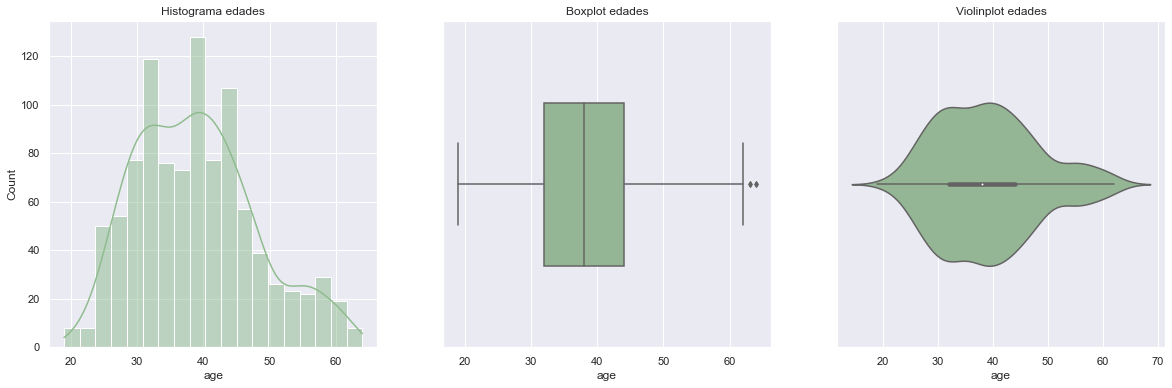

,age
count,1000.000000
mean,38.948000
std,9.140287
min,19.000000
25%,32.000000
50%,38.000000
75%,44.000000
max,64.000000


In [10]:
## Distribución de Edad

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(insurance_claims['age'], color = 'darkseagreen', kde = True )
plt.title('Histograma edades')

plt.subplot(1,3,2)
sns.boxplot(x = insurance_claims['age'], width = 0.5, fliersize = 4, color = 'darkseagreen' )
plt.title('Boxplot edades')

plt.subplot(1,3,3)
sns.violinplot(x = insurance_claims['age'], width = 0.5, fliersize = 4, color = 'darkseagreen' )
plt.title('Violinplot edades')

plt.show()

insurance_claims['age'].describe().to_frame()

Para la variable edad o age, se refiere a una característica que tiene el asegurado, su edad. Se puede identificar que las personas que hicieron reclamaciones en este periodo de tiempo tenían entre 19 y 64 años. Gracias al boxplot podemos observar que existen dos datos atípicos en este dataset, correspondiente a dos personas que tenían más de 60 años al momento del incidente. En promedio las personas presentan una edad de 38 años con una desviación estándar de 9 años, lo que indica una baja dispersión de los datos.  En el histograma se puede observar tres picos que corresponden  a las edades más frecuentes de los asegurados, de 32-43 años, de 38-40 años y de 42-44 años. Todo lo anterior se contrasta con con las edades típicas en que las personas, más específicamente en Estados Unidos, adquieren vehículos por lo cual los rangos de edades tiene bastante sentido. Por otro lado se observa que el mayor número de incidentes los presentaron personas entre los 25 años y 45, lo que puede ser producto de la falta de responsabilidad y experiencia que tienen los conductores de estas edades, a comparación se sus contrapartes, personas de 50 años o más, esto lleva a los datos a presentar una leve asimetría hacia la derecha que muestra que a la hora de usar el seguro es menor frecuente después de los 30 años y con mayor frecuencia después de los 24 años.

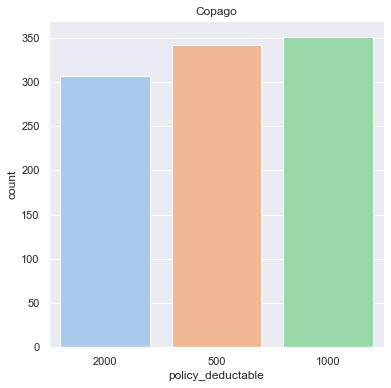

In [11]:
## Distribución de copago

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['policy_deductable'], data =insurance_claims, palette= 'pastel', order = insurance_claims.policy_deductable.value_counts().index[::-1])
plt.title('Copago')
plt.show()

Esta variable hace referencia a las características de la póliza. La variable copago o policy_deductable, se refiere al valor que debe pagar el asegurado en caso de siniestro, para que el asegurador entre a responder por una parte o la totalidad del daño causado en el siniestro. Como se observa en el gráfico de barras, los tres valores de copagos son: USD 500, USD 1000 y USD 2000, siendo el copago de USD 1000 más frecuente, el cual fue pagado por 350 personas.  En contraste, el valor de 2000 copago, valor más alto, fue pagado por un número menor de personas correspondiente a 300 personas.

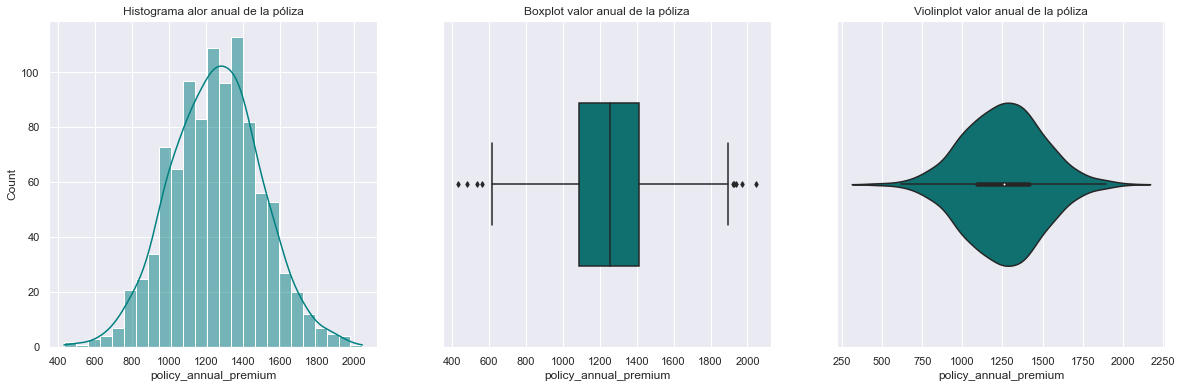

,policy_annual_premium
count,1000.000000
mean,1256.406150
std,244.167395
min,433.330000
25%,1089.607500
50%,1257.200000
75%,1415.695000
max,2047.590000


In [12]:
## Distribución de valor anual de la póliza

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(insurance_claims['policy_annual_premium'], kde=True, color = 'teal')
plt.title('Histograma alor anual de la póliza')

plt.subplot(1,3,2)
sns.boxplot(x = insurance_claims['policy_annual_premium'], width = 0.5, fliersize = 4, color = 'teal')
plt.title('Boxplot valor anual de la póliza')

plt.subplot(1,3,3)
sns.violinplot(x = insurance_claims['policy_annual_premium'], width = 0.5, fliersize = 4, color = 'teal')
plt.title('Violinplot valor anual de la póliza')

plt.show()

insurance_claims['policy_annual_premium'].describe().to_frame()

La variable policy_annual_premium o valor anual de póliza indica el valor de la prima que el asegurado debe pagar para adquirir una póliza y quedar asegurado. En el boxplot y el histograma se puede visualizar que los pagos de la póliza varían entre USD 433-2047 y presentan una dispersión alta con datos atípicos en los dos extremos del boxplot, con valores inferiores a 600 USD y superiores a 1850 USD. En el histograma y el violinplot se observa que los datos presentan una distribución simétrica, por lo que la mediana y la media se encuentran muy cercanas, siendo la la media de USD 1256 y la mediana de USD 1257.  También, esta variable tiene una desviación estándar de 115 meses, lo que indica una moderada dispersión de los datos. Por otro lado se puede ver que la distribución de la variable se parece a una normal. Los valores de esta distribución pueden tener esta forma debido a que el pricing para las pólizas varía de cliente a cliente, costando más a aquellos a los que se les deba asumir mayor riesgo. 

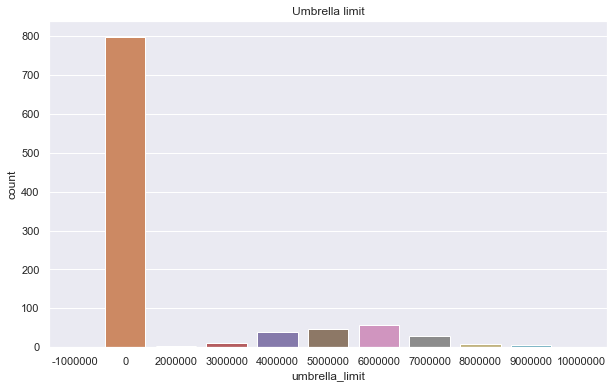

,umbrella_limit
count,1.000000e+03
mean,1.101000e+06
std,2.297407e+06
min,-1.000000e+06
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+07


In [13]:
## Distribución umbrella_limit

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x = insurance_claims['umbrella_limit'], data = insurance_claims, palette = 'deep')
plt.title('Umbrella limit')
plt.show()

insurance_claims['umbrella_limit'].describe().to_frame()

El límite de monto que el seguro cubre en caso de un siniestro que ocurra con el vehículo a un miembro de la familia distinto al poseedor de la póliza es explicado por la variable Límite de sombrilla  o Umbrella limit. En la gráfica de barras se puede identificar que en la mayoría de los casos el límite de pago que cubre el seguro es de USD 0, es decir, que la aseguradora no tenía la obligación de responder por estos accidentes en donde el culpable/la persona presente, sea una persona distinta al asegurado, observandose que esta variable alcanza 800 de los casos, es decir el 80% de los datos para esta variable. Por otro lado se ve que el 20% restante de los datos, la aseguradora cubriría hasta ciertos montos en este tipo de contingencia, sin embargo, ninguno de estos se sobrepasa los 100 clientes que adquirieron este beneficio, siendo 600.000 USD el monto al que mayor se suscribieron para este beneficio de umbrella como cerca de 50 clientes.

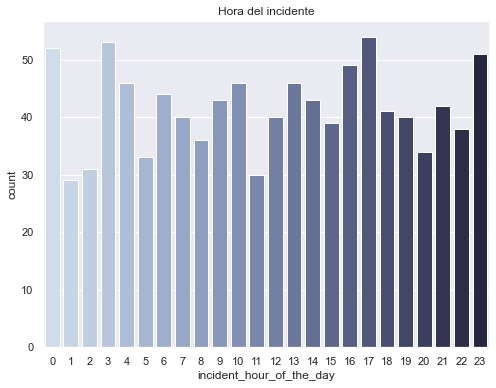

In [14]:
## Distribución de la hora del incidente

sns.set()
plt.figure(figsize=(8,6))
sns.countplot(x = insurance_claims['incident_hour_of_the_day'], data = insurance_claims, palette = 'ch:s=.0,rot=-.1')
plt.title('Hora del incidente')
plt.show()

Con respecto a la variable inicident_hour_of_the_day o la hora del día en que ocurrió el accidente, se observa en el histograma que las horas donde se presentaron la mayor cantidad de incidentes fueron las 17, 3, 0 y 23 horas seguido. Por otro lado, la 1, 2, 5, 11 fueron las horas que menos incidentes ocurrieron. En general, y como era de esperarse, no hay una tendencia en la variable hora del día, es decir que los incidentes se pueden presentar a cualquier momento.

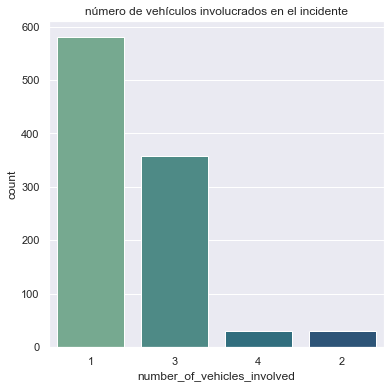

In [15]:
## Distribución del número de vehículos involucrados en el incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['number_of_vehicles_involved'], data = insurance_claims, palette='crest', order = insurance_claims.number_of_vehicles_involved.value_counts().index)
plt.title('número de vehículos involucrados en el incidente')
plt.show()

La variable number_of_vehicles_involved se refiere al número de vehículos involucrados en el incidente. En la gráfica de barras se observa que es más frecuente que se presente un siniestro con 1 o con 3 vehículos. Particularmente, cuando se encontró un solo carro involucrado; se presentó una frecuencia de 580 casos, seguido de 350 casos donde se involucran 3 vehículos. Con respecto a los casos de 2 y 4 carros involucrados se presentaron solo en 20 casos cada uno. Es intrigante, que existan más casos en los cuales el número de vehiculos involucrados fuera de 3 en contraste con los casos en donde el número de vehículos fueran de 2, pues cuando ocurren colisiones, entre más conductores se encuentren al volante mayor será el número de personas que reaccionarán ante esta eventualidad.

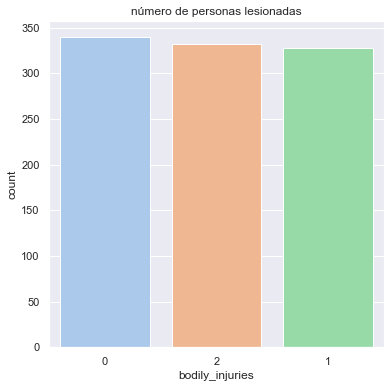

In [16]:
## Distribución del número de personas que sufrieron lesiones

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['bodily_injuries'], data = insurance_claims, palette = 'pastel', order = insurance_claims.bodily_injuries.value_counts().index)
plt.title('número de personas lesionadas')
plt.show()

En la variable de un número de personas lesionadas se puede observar que no existe una tendencia clara, lo que es de esperarse, pues las probabilidades de lesionar 0, 1, 2, etc varía con el número de personas presentes. En este dataset se observa que la mayoría de los casos no involucran personas lesionados y que se lesionan 1 o 2 personas con casi la misma frecuencia.

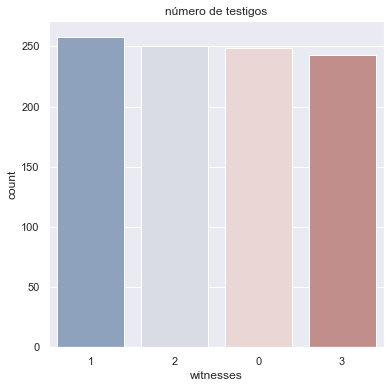

In [17]:
## Distribución de numero de testigos

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['witnesses'], data = insurance_claims, palette = 'vlag', order = insurance_claims.witnesses.value_counts().index)
plt.title('número de testigos')
plt.show()

Witnesses es una variable que muestra el número de testigos que presenciaron el accidente. En la mayoría de los incidentes se reporta solo una persona como testigo, en donde se informan 260 casos. Por otro lado se ve que es menos común que se encuentren 3 personas como testigos, con 240 casos reportados. En general, no se presenta una gran diferencia entre el número de personas que fueron testigos y al igual que la anterior variable es de esperarse, pues varía del número de personas presentes.

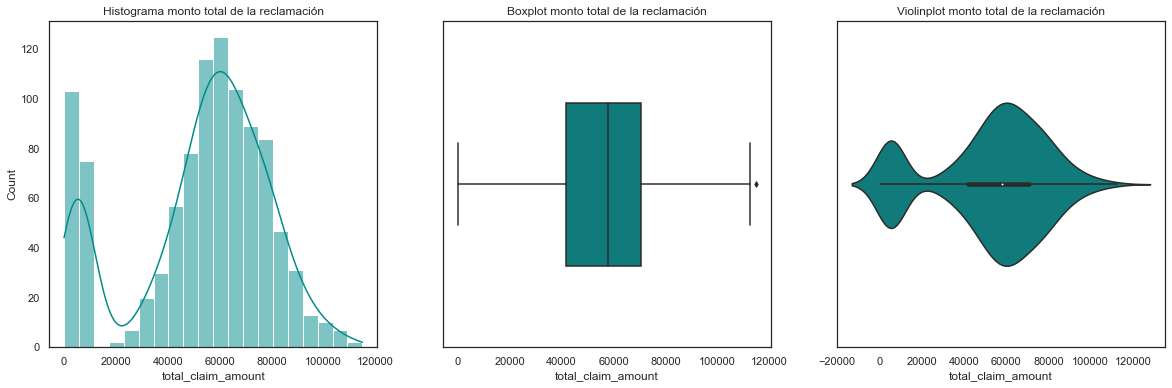

,total_claim_amount
count,1000.00000
mean,52761.94000
std,26401.53319
min,100.00000
25%,41812.50000
50%,58055.00000
75%,70592.50000
max,114920.00000


In [18]:
## Distribución del monto Total de la reclamación

sns.set()
plt.figure(figsize=(20,6))
sns.set_style('white')

plt.subplot(1,3,1)
sns.histplot(insurance_claims['total_claim_amount'], bins=20, color = 'darkcyan', kde = True)
plt.title('Histograma monto total de la reclamación')

plt.subplot(1,3,2)
sns.boxplot(x = insurance_claims['total_claim_amount'], width = 0.5, fliersize = 4, color = 'darkcyan')
plt.title('Boxplot monto total de la reclamación')

plt.subplot(1,3,3)
sns.violinplot(x = insurance_claims['total_claim_amount'], width = 0.5, color = 'darkcyan')
plt.title('Violinplot monto total de la reclamación')

plt.show()

insurance_claims['total_claim_amount'].describe().to_frame()

La variable monto total de la reclamación indica el monto por el cual se está haciendo la reclamación a la aseguradora, agregando en esta los montos de reclamación por propiedad, vehículo y lesiones. Se puede observar en el gráfico de boxplot que el monto varía de USD 100 a USD 114920, con una mediana de USD 58055 y media de USD 52761, lo que lo lleva a un ajuste muy próximo a una distribución normal. Por otro lado, mediante el boxplot se observa que se presentó un dato atípico donde la reclamación alcanza los USD 114920 que corresponde al valor máximo. Por otro lado, la desviación estándar de USD 26401, el cual indica una moderada dispersión de los datos. En el histograma y el violinplot se puede detectar dos picos que muestran que el monto con el que se está realizando la reclamación con más frecuencia se presenta entre los USD 100- USD 1300 y USD 6000 - USD 6500. También, se puede ver que no se realizó ninguna reclamación por montos entre USD 1300 y USD 2000.

In [19]:
## Nuevo dataset con el monto de reclamaciones desagrupado

monto_reclamacion = pd.read_csv('Dataset/monto reclamacion desagrupado.csv')

<Figure size 720x720 with 0 Axes>

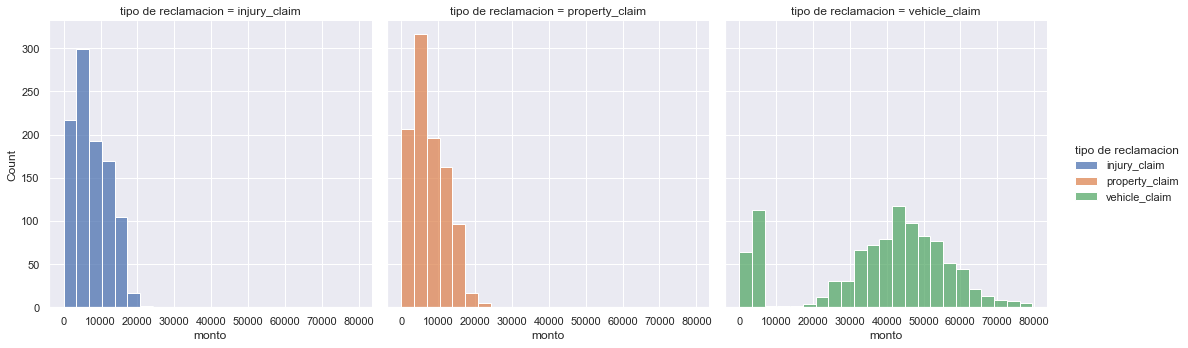

In [20]:
## Distribucion de monto de reclacion desagrupado en reclamacion por lesiones, propiedad, vehiculo

sns.set()
plt.figure(figsize=(10,10))
sns.displot(x = monto_reclamacion['monto'], data = monto_reclamacion, hue = monto_reclamacion['tipo de reclamacion'], col = monto_reclamacion['tipo de reclamacion'])

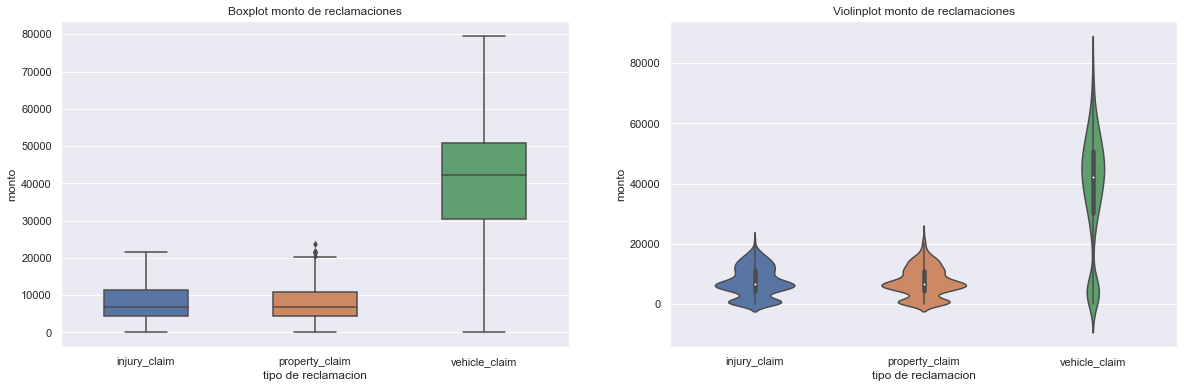

,count,mean,std,min,25%,50%,75%,max
tipo de reclamacion,,,,,,,,
injury_claim,1000.0,7433.42,4880.951853,0.0,4295.0,6775.0,11305.0,21450.0
property_claim,1000.0,7399.57,4824.726179,0.0,4445.0,6750.0,10885.0,23670.0
vehicle_claim,1000.0,37928.95,18886.252893,70.0,30292.5,42100.0,50822.5,79560.0


In [21]:
## Distribucion de monto de reclacion desagrupado en reclamacion por lesiones, propiedad, vehiculo

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(y = monto_reclamacion['monto'], x = monto_reclamacion['tipo de reclamacion'], data = monto_reclamacion,  width = 0.5, fliersize = 4)
plt.title('Boxplot monto de reclamaciones')

plt.subplot(1,2,2)
sns.violinplot(y = monto_reclamacion['monto'], x = monto_reclamacion['tipo de reclamacion'], data = monto_reclamacion,  width = 0.5, fliersize = 4)
plt.title('Violinplot monto de reclamaciones')

plt.show()

monto_reclamacion.groupby('tipo de reclamacion').monto.describe()

En el dataset se discrimina los tres tipos de montos por los cuales se hizo una reclamación a la aseguradora: reclamación por propiedad que hace referencia al monto por los daños a propiedad ocasionadas en el accidente; reclamación por vehículo que indica el monto de reclamación por daños al vehículo y reclamaciòn por lesiones que muestra el monto por las lesiones a las personas involucradas en el accidente. En el histograma y el boxplot se observa que el monto por la reclamación por lesiones y por propiedad presentan valores muy similares con un mínimo de 0 y un máximo de USD 23670 y USD 21450 para la variable reclamación por propiedad y reclamación por lesión respectivamente. En el boxplot y violinplot, se muestra un pico desde USD 300 a USD 600 con una baja dispersión de los datos. Adicionalmente se ve que la variable reclamación por propiedad presenta muestra 3 datos atípicos. 

En contraste, la variable reclamación por vehículo, el cual es el objetivo principal de la póliza presenta mayor dispersión  con un valor mínimo de USD 70  y máximo de USD 79560 como se observa en el boxplot y en el violinplot. Adicionalmente, se observa que la variable reclamación por vehículo, tiene dos picos mostrando sus valores más frecuentes, que van desde USD 70 hasta los USD 1000.

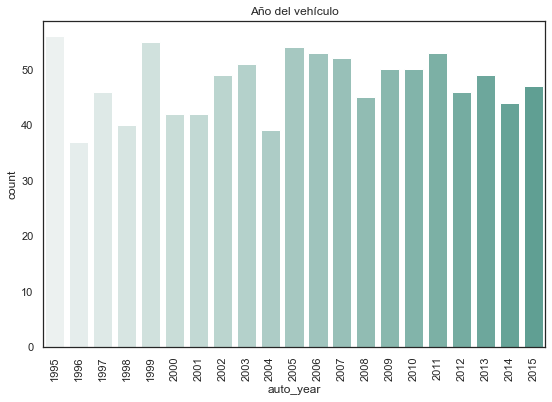

In [22]:
## Distribución del año del vehículo

sns.set()
sns.set_style('white')
plt.figure(figsize=(9,6))
sns.countplot(x = insurance_claims['auto_year'], data = insurance_claims, palette = 'light:#5A9')
plt.xticks(rotation = 90)
plt.title('Año del vehículo')
plt.show()

Con respecto a la variable del año del vehículo, se encuentran vehículos desde 1995 hasta 2015. El vehículo más antiguo, fabricado en el año de 1995, presenta la mayor frecuencia de incidentes con 65 casos y los casos con la menor frecuencia son de vehículos del año 1996. Como es de esperarse, esta variable no debería tener ninguna tendencia pues cualquier vehículo sin importar el año puede ser objeto de seguro y de siniestro del mismo.

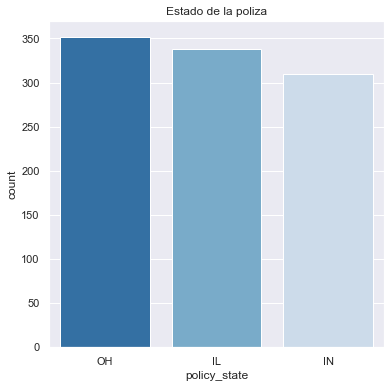

In [23]:
## Distribución de Estado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['policy_state'], data = insurance_claims, palette = 'Blues_r', order = insurance_claims.policy_state.value_counts().index)
plt.title('Estado de la poliza')
plt.show()

El estado de la póliza es una variable que describe características de la póliza y se relaciona con el estado en el que fue se expidió la póliza en donde OH es Ohio, IN es Indiana y IL es Ilinois. Se observa que la compañía opera principalmente en el estado de Ohio, seguido de Ilinois. El estado de Ohio es el estado en donde se han expedido más pólizas por 350 personas seguido de Illinois es el segundo con 370 pólizas y finalmente, Indiana con 310 casos.

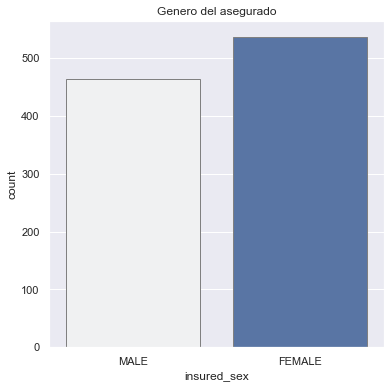

In [24]:
## Distribución de genero del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['insured_sex'], data = insurance_claims, palette = 'light:b', ec='gray')
plt.title('Genero del asegurado')
plt.show()

La variable género se encuentra discriminado en Female (mujer) y Male (Hombre). En este gráfico de barras se puede determinar que en este dataset las mujeres son las que más adquieren seguros en contraste con los hombres, con un 54% vs un 46% de los clientes.

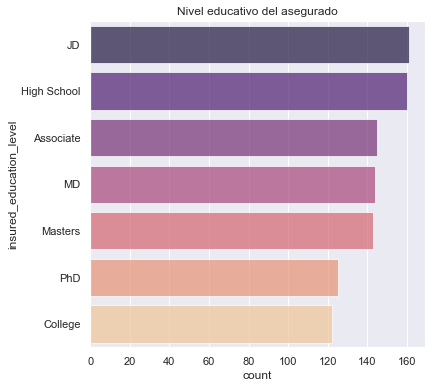

In [25]:
## Distribución del nivel educativo del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_education_level'], data = insurance_claims, palette = 'magma', alpha= 0.7, order = insurance_claims.insured_education_level.value_counts().index)
plt.title('Nivel educativo del asegurado')
plt.show()

Como se observa en el gráfico de barra, el nivel educativo de los asegurados con mayor frecuencia son Doctores en derecho (JD) y estudios hasta la Secundaria (High School) con 160 personas en cada categoría.  Los tecnólogos (Associate), Doctores en Medicina  (MD) y personas con Maestría (Master) representan 146 personas de que cuentan con el seguro cada uno. En el caso de personas que poseen el Doctorado (PHD) y pregrado (College) son las menos frecuentes con 121 y 126  personas aseguradas respectivamente.

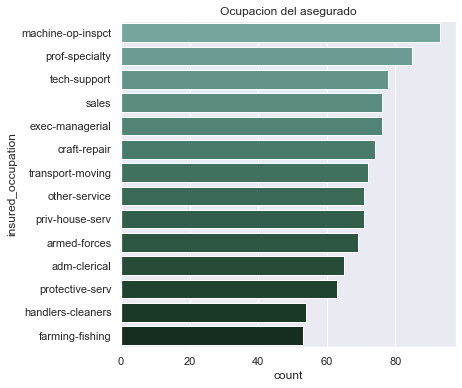

In [26]:
## Distribución del ocupacion del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_occupation'], data = insurance_claims, palette = 'ch:2,r=.2,l=.6', order = insurance_claims.insured_occupation.value_counts().index)
plt.title('Ocupacion del asegurado')
plt.show()

Cabe resaltar que las personas con trabajos como inspector de maquinaria son los clientes que más frecuentemente aseguran sus automóviles, con 93 personas, seguido de profesionales especializados con un 85 personas asegurados. En contraste las personas que aseguran sus vehiculos con menos frecuencia son las que se ocupan en piscicultura y limpieza, cuyos clientes son aproximadamente 53 personas, como es de esperarse pues pueden llegar a ser los que menos ingresos devengan dentro de las profesiones mencionadas.

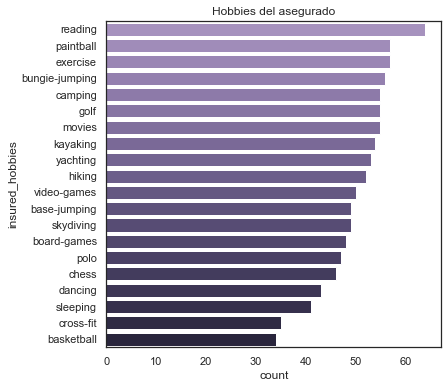

In [27]:
## Distribución del hobbies del asegurado

sns.set()
sns.set_style('white')
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_hobbies'], data = insurance_claims, palette = 'ch:3,r=.1,l=.6', order = insurance_claims.insured_hobbies.value_counts().index)
plt.title('Hobbies del asegurado')
plt.show()

Se puede observar que la variable hobbies del asegurado presenta variedad de categorías. Sin embargo, la lectura es el hobbie con mayor frecuencia el cual fue reportado como hobbie por 64 personas. Por otro lado, el baloncesto y crossfit fueron elegidos con menor frecuencia, por 34 y 35 personas respectivamente.

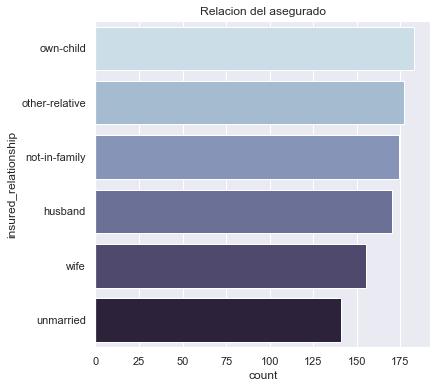

In [28]:
## Distribución del relacion del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_relationship'], data = insurance_claims, palette = 'ch:s=.25,rot=-.25', order = insurance_claims.insured_relationship.value_counts().index)
plt.title('Relacion del asegurado')
plt.show()

Insured en este dataset es el beneficiario de esa póliza, o quien recibirá los pagos por parte de la aseguradora en caso de que se materialice el objeto de la póliza. La relación que tiene el beneficiario (anteriormente descrito) con la persona que hace la reclamación es representada por esta variable. Se observa que los valores de esta variable son own-child, other relative, no in family, husband, wife, unmarried, para referirse respectivamente a hijo propio en caso que los padres sean los beneficiarios, otra persona de la familia en caso que tenga un tío u otro relativo, una persona externa a la familia en caso que el beneficiario no sea de la familia, el esposo, la esposa o unión libre según sea el caso, siendo su pareja sentimental el beneficiario de dicha póliza. Se puede observar en esta variable que los clientes de las pólizas ponen más frecuentemente a un familiar de beneficiario de las pólizas, padres u otros familiares seguido por sus compañeros sentimentales.

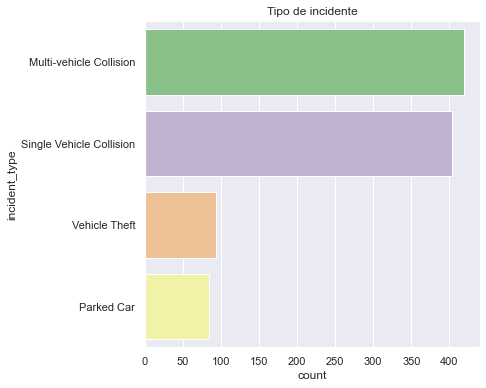

In [29]:
## Distribución del Tipo de incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['incident_type'], data = insurance_claims, palette = 'Accent', order = insurance_claims.incident_type.value_counts().index)
plt.title('Tipo de incidente')
plt.show()

Al revisar la variable tipo de incidente, este se subdivide en cuatro categorías: Multi- vehicle Collision, Single vehicle Collision, vehicle theft y Parked car. En el gráfico de barras se observa que el tipo de siniestro por el cual se está reclamando con más frecuencia es Choque con varios vehículos o con un vehículo con valores de 425 y 400 casos, respectivamente. Por otro lado, los menos frecuentes son incidentes mientras estaba estacionado y robo de vehìculo que corresponden a menos de 100 casos cada uno.

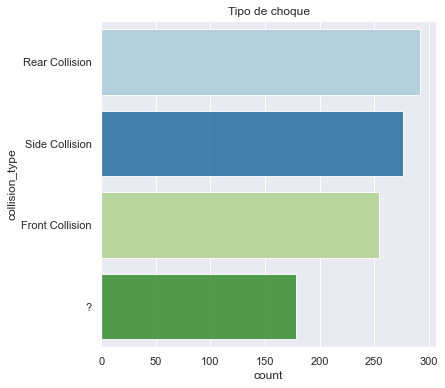

In [30]:
## Distribución del Tipo de choque

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['collision_type'], data = insurance_claims, palette = 'Paired', order = insurance_claims.collision_type.value_counts().index, alpha = 0.9)
plt.title('Tipo de choque')
plt.show()

Los tipos de choque es la forma que colisionaron al vehículo y pueden categorizarse de 4 formas; Rear Collision, Side colisión, Fron Colision y no  determinado (?). Estas categorías se refieren a  daño trasero, daño por los lados o en el frente. El tipo de choque más frecuente es el daño trasero, seguido del daño por los lados mientras que el menos frecuente es de frente. Cabe resaltar que son más de 150 casos en los que no se reportó el tipo de choque por lo cual se asumirán como datos faltantes, en la ajuste y preprocesamiento de los datoso se lidiará con este problema para introducirlo al modelo de clasificación

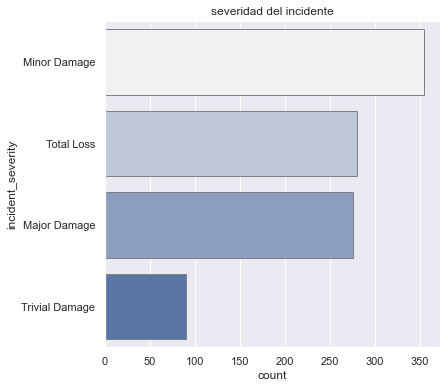

In [31]:
## Distribución del severidad del incidente

sns.set()
sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['incident_severity'], data = insurance_claims, palette = 'light:b', order = insurance_claims.incident_severity.value_counts().index, ec = 'gray')
plt.title('severidad del incidente')
plt.show()

Con respecto a la variable severidad del incidente este presenta 4 categorías: minor Damage o daño menor, Total Loss o pérdida total, Major Damage o Daño mayor y Trivial Damage que es un daño trivial. Los casos relacionados con daños menores son los más reportados a la aseguradora.

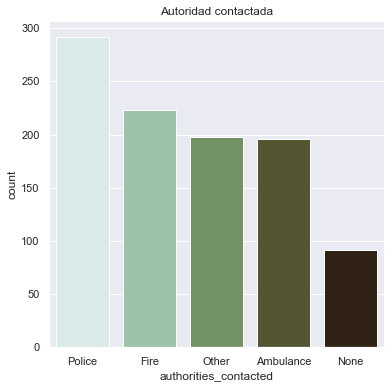

In [32]:
## Distribución del Autoridad contactada

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['authorities_contacted'], data = insurance_claims, palette = 'ch:1,r=.5,l=.9', order = insurance_claims.authorities_contacted.value_counts().index)
plt.title('Autoridad contactada')
plt.show()

authorities_contacted es una variable cualitativa que indica que autoridad fue contada después del incidente. Está categorizada como Police (Policía), Fire (Bomberos), other (Otros), Ambulance (Ambulancia) y None (Ninguna). Gracias a este gráfico de barras y en este dataset se puede observar que las personas llaman con más frecuencia a la Policía que a otra entidad. En segundo lugar se llaman los bomberos, seguido de otros y la ambulancia. Finalmente, se ve que hay menos de 100 casos donde no se contactó ninguna autoridad.

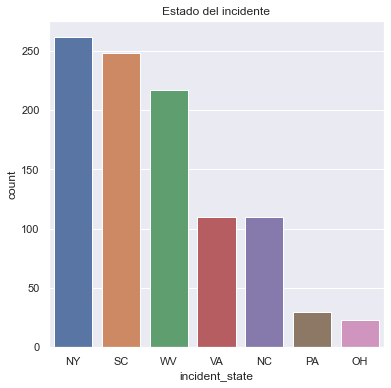

In [33]:
## Distribución del Estado del incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['incident_state'], data = insurance_claims, order = insurance_claims.incident_state.value_counts().index)
plt.title('Estado del incidente')
plt.show()

Esta variable hace referencia al estado donde ocurrió el incidente, se observa que en los estados donde más ocurren son Nueva York, South Carolina y West Virginia, y donde menos incidentes ocurren es Ohio y Pensilvania, posiblemente por su organización en el tránsito y control de este tipo de incidentes

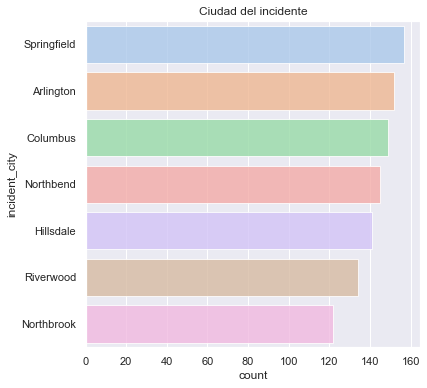

In [34]:
## Distribución del ciudad del incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['incident_city'], data = insurance_claims, palette = 'pastel', alpha = 0.8, order = insurance_claims.incident_city.value_counts().index)
plt.title('Ciudad del incidente')
plt.show() 

Esta variable muestra información muy similar a la anterior, clasificando los incidentes dentro un mayor numero de subgrupos, sin embargo la información es redundante con Incident_State

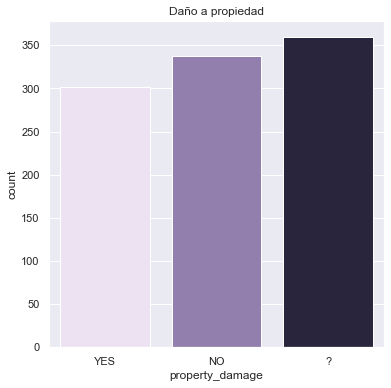

In [35]:
## Distribución del daño a propiedad

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['property_damage'], data = insurance_claims, palette = 'ch:3,r=.1,l=.9', order = insurance_claims.property_damage.value_counts().index[::-1])
plt.title('Daño a propiedad')
plt.show() 

Se refiere a si se incurrió o no en daño a la propiedad en el incidente. La gráfica de barras muestra que para esta variable existieron varios valores faltantes dado que en la mayoría de los casos se desconoce si se presentó un daño (?). Por otro lado cuando este se reporta es más frecuente que no se presenta un daño a la propiedad.

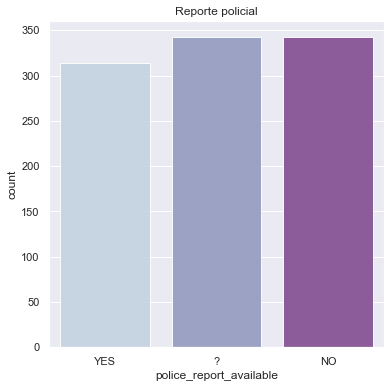

In [36]:
## Distribución del reporte policial

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['police_report_available'], data = insurance_claims,  palette = 'BuPu', alpha = 0.9, order = insurance_claims.police_report_available.value_counts().index[::-1])
plt.title('Reporte policial')
plt.show() 

La variable Police_report_avaliable hace referencia a que sí existió un reporte policial del incidente. Esta variable presenta 3 categorías: si existió el reporte (YES), si no existió (NO) o se desconoce (?). La gráfica de barras muestra que las personas que sufren un incidente no llenan un reporte policial o el mismo no se encuentra disponible, lo que podría dificultar la reclamación del seguro, en contraste los incidentes que sí fueron reportados presenta menor frecuencia.

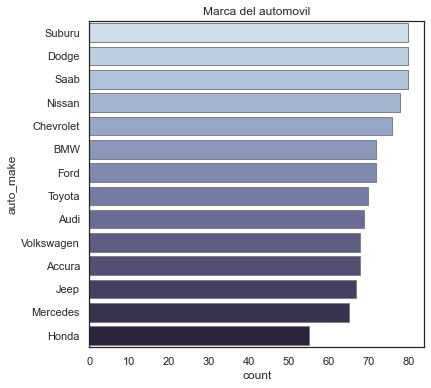

In [37]:
## Distribución del marca del automovil

sns.set()
sns.set_style('white')
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['auto_make'], data = insurance_claims, palette = 'ch:start=.2,rot=-.2', ec = 'gray', order = insurance_claims.auto_make.value_counts().index)
plt.title('Marca del automovil')
plt.show() 

La variable marca de automovil, al igual que año del automovil, presenta varias categorias con valores que no varían drasticamente entre si. Se observa que los automoviles más asegurados en este dataset son Suburu, Saab y Dodge, y el menos asegurado es Honda

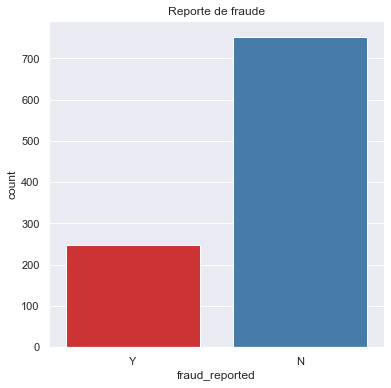

In [38]:
## Distribución del Reporte de fraude

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['fraud_reported'], data = insurance_claims, palette = 'Set1')
plt.title('Reporte de fraude')
plt.show() 

Finalmente, la variable fraud_reported o la variable label para nuestro caso muestra el problema de desbalance de los datos, representando el número de casos que se han reportado como fraude. El gráfico de barras muestra que en la mayoría de los casos no existió fraude (N), con valores que van de 250 casos donde identificó como fraude( Y) y 750 sin reporte de fraude(N), es decir, de 25% vs 75% de los casos. 

## Analisis multivariado

In [39]:
## Generar todas las correlaciones de las variables continuas

# Seleccion de las variables continuas a revisar
num_var = insurance_claims.loc[:,['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']]

# Dado que severidad del incidente no es una variable numerica, se debe dummificar para verificar su correlacion con las demas variables
dummy_var = pd.get_dummies(insurance_claims.incident_severity)

# Concatenar las variables numericas con la variable severidad del accidente
matriz_num = pd.concat([num_var, dummy_var], axis = 1)

# Coeficiente de Correlacion de pearson para las variables continuas
cor_matriz = round(matriz_num.corr(),3)
cor_matriz

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,Major Damage,Minor Damage,Total Loss,Trivial Damage
months_as_customer,1.000,0.922,0.027,0.005,0.015,0.015,-0.010,0.058,0.062,0.065,0.035,0.061,0.025,0.036,-0.027,-0.057
age,0.922,1.000,0.029,0.014,0.018,0.022,-0.016,0.052,0.070,0.076,0.061,0.063,0.030,0.026,-0.022,-0.055
policy_deductable,0.027,0.029,1.000,-0.003,0.011,0.051,-0.023,0.067,0.023,0.039,0.065,0.005,0.005,0.006,0.003,-0.024
policy_annual_premium,0.005,0.014,-0.003,1.000,-0.006,-0.046,0.027,0.002,0.009,-0.018,-0.012,0.020,-0.007,0.014,0.014,-0.034
umbrella_limit,0.015,0.018,0.011,-0.006,1.000,-0.021,0.023,-0.007,-0.040,-0.045,-0.024,-0.039,-0.025,0.040,-0.030,0.020
number_of_vehicles_involved,0.015,0.022,0.051,-0.046,-0.021,1.000,0.014,-0.015,0.274,0.225,0.219,0.269,0.131,-0.068,0.107,-0.259
bodily_injuries,-0.010,-0.016,-0.023,0.027,0.023,0.014,1.000,-0.006,0.047,0.047,0.040,0.043,0.025,-0.006,-0.024,0.007
witnesses,0.058,0.052,0.067,0.002,-0.007,-0.015,-0.006,1.000,-0.011,-0.025,0.053,-0.023,0.045,-0.052,-0.003,0.019
total_claim_amount,0.062,0.070,0.023,0.009,-0.040,0.274,0.047,-0.011,1.000,0.805,0.811,0.983,0.265,-0.116,0.220,-0.566
injury_claim,0.065,0.076,0.039,-0.018,-0.045,0.225,0.047,-0.025,0.805,1.000,0.564,0.723,0.185,-0.061,0.158,-0.434


In [40]:
## Generar un dataframe con las correlaciones mas relevantes

# Definir una funcion que filtre los coeficientes superiores a un porcentaje, que tome como imput la matriz de coeficientes y el porcentaje deseado

def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

# Crear un dataframe que filtre los variables que tengan un coeficiente de correlacion superior al 0.3 con cualquier otra variable

high_cor = absHighPass(cor_matriz, 0.3)

In [41]:
## Crear mascara para mostrar solo la parte inferior del heatmap

mask = np.zeros_like(high_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

<AxesSubplot:>

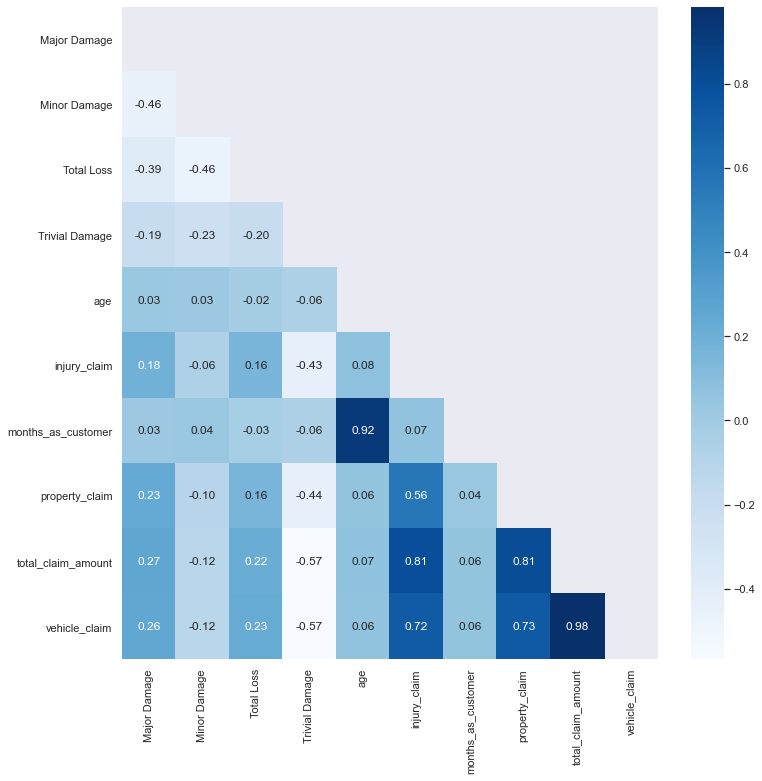

In [92]:
## Heatmap de la correlacion de variables continuas con coeficientes superiores a 0.3

sns.set()
plt.figure(figsize=(12,12))
sns.heatmap(high_cor, mask = mask, cmap = 'Blues', annot=True, fmt = '.2f')

Mediante el heatmap se evalua la correlacion entre 6 variales numéricas continuas y 1 variable categorica que fue dummificada para esta correlación. Por parte de las variables numéricas se analizó edad del asegurado, valor de reclamacion por lesiones, meses como clientes, valor de  reclamacion por propiedad, valor de reclamación total  y reclamacion del vehiculo; y por parte de la variable categorica se utilizó severidad del incidente. 

Se encontró que existe una alta correlación entre el valor total de la reclamación con el valor reclamado por el automóvil, por propiedad y por lesión con una correlación mayor a 0.81, lo que es de esperarse debido a que estas son unas subcategorías del valor total de reclamación. Estas variables a pesar de ser el desagregado de total del reclamo no se eliminaron del análisis porque aportan información individualmente, que no sería posible contrastar de manera agrupada mediante la variable total de reclamación. Del mismo modo, hay una correlación entre estas subcategorías de la reclamacion, que oscilan entre el 0.56 hasta 0.73.  

Otra importante correlacción que se observa, está entre la edad del asegurador y los meses que lleva como cliente, esto puede ser debido a que entre más edad tiene una persona, más se preocupa por el detrimento que pueda sufrir su patrimonio mediante eventos fortuitos.

finalmente, se observan ciertas correlaciones de los montos por reclamación con la variable dummy, que agrupa las categorias de daño mayor, daño menor, daño trivial y perdida total.

<Figure size 720x720 with 0 Axes>

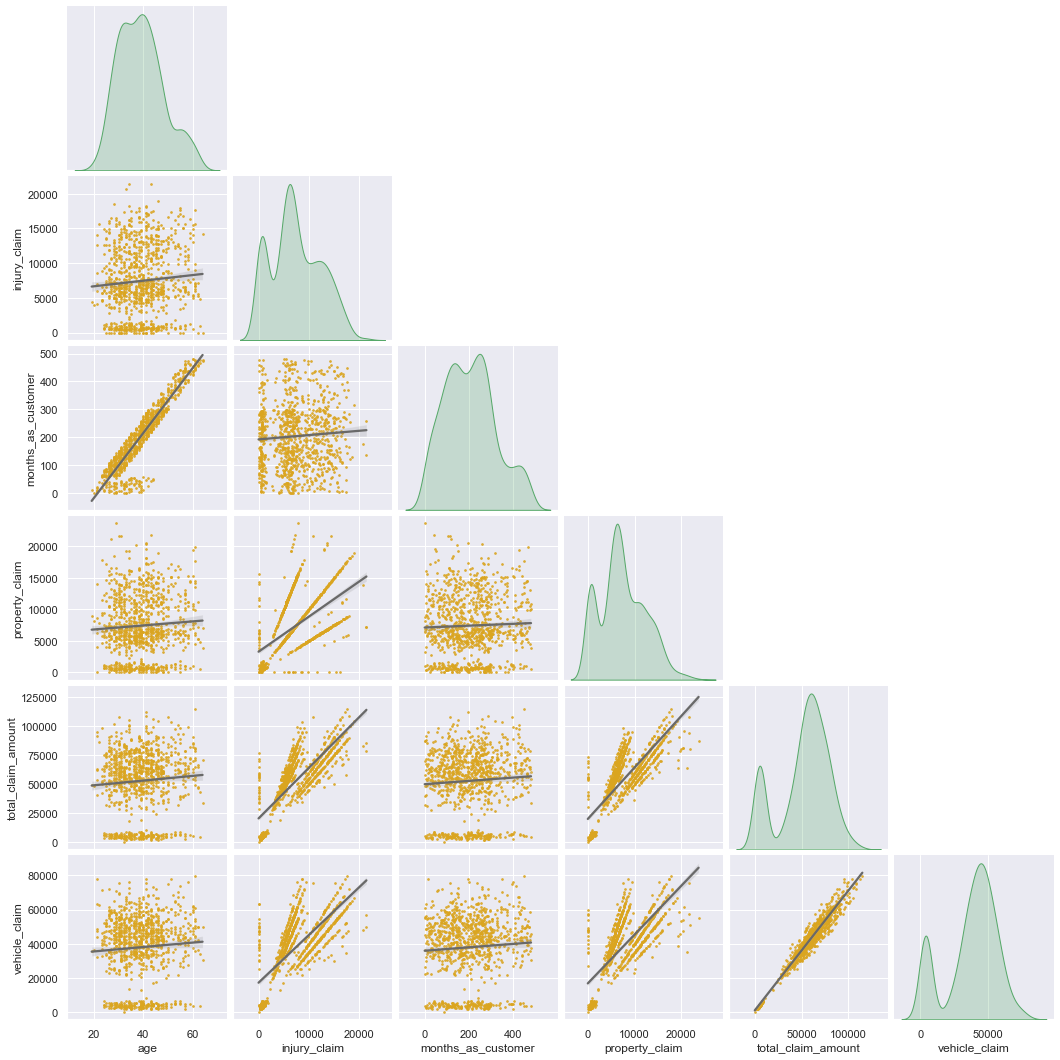

In [87]:
## Grafica de la correlacion de variables continuas con coeficientes superiores a 0.3

sns.set()
plt.figure(figsize=(10,10))
sns.pairplot(insurance_claims, 
             corner = True,
             vars = ['age', 'injury_claim', 'months_as_customer', 'property_claim', 'total_claim_amount', 'vehicle_claim'], 
             diag_kind = 'kde', 
             diag_kws = {'color': 'g'}, 
             kind= 'reg', 
             plot_kws = {'color': 'dimgray','scatter_kws': {'color':'goldenrod', 's': 3}})

Al observar más detalladamente la correlación que existe entre las variables, se puede ver de forma más específica la correlación positiva que tiene la variable monto total por reclamación, contrastado con las subcategorias de reclamo por vehículo, lesión y propiedad. 

Se ve, de igual manera, una correlación positiva entre las variables edad y meses como cliente, lo cual ya había sido observado en el heatmap.

Adicional a lo anterior, se ve que las correlaciones que tienen las variables edad y meses como cliente con las variables de monto de reclamación y sus subcategorias es muy bajo, e inclusive inexistente.

In [45]:
## Generar un clustermap para observar las variables que mas se parecen entre ellas y las que mas difieren

# Generar una bandera para observar la variable categorica de nuestro interes, fraud_reported, dentro del cluster map
fraud_colors = insurance_claims.fraud_reported.map({
 'Y':'Red',
 'N':'White'
})

# Seleccion de las variables continuas con coeficientes superiores a 0.3
variables_numericas = ['age', 'injury_claim', 'months_as_customer', 'property_claim', 'total_claim_amount', 'vehicle_claim']

<Figure size 720x720 with 0 Axes>

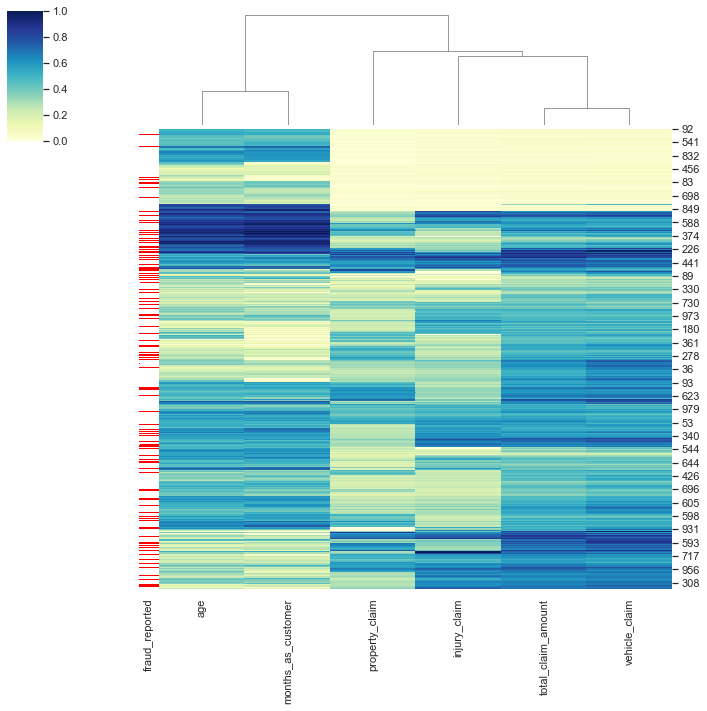

In [88]:
## Grafica de clustermap de las variables continuas con coeficientes superiores a 0.3

sns.set()
plt.figure(figsize=(10,10))
cg = sns.clustermap(insurance_claims[variables_numericas], standard_scale = 1, row_colors = fraud_colors, cmap='YlGnBu', metric = 'euclidean')
cg.ax_row_dendrogram.set_visible(False)

El clustermap por su lado, nos ayuda a observar cuales son las variables se parecen y cuales difieren más. Para ello realiza una agrupación mediante el método de Hierarchical Aglomerative Clustering (HAC), el cual consiste ir generando clusters con las variables que menor distancia tengan. A su vez este método utiliza dendogramas que se observan en la parte superior del nuestra figura, los cuales muestran la manera en que fueron formados los grupos. Se ve que las variables que más relación tienen son reclamación por vehículo con total de reclamación, seguido por edad y meses como cliente. El método fue agrupando el resto de variables hasta dejar un solo cluster, en donde se encuentran todas las variables. Se observa que la agrupación se hizo por un lado con los valores de la reclamación, por vehiculo, lesión, propiedad y total, y por el otro lado una agrupación de edad y meses como clientes.

De igual manera se intentó colocar una bandera, que identifica a los casos en donde se cometió fraude, correspondiente a las lineas rojas que se encuentran a la izquierda, para poder identificar asi una relación apriori que tuvieran los defraudadores con las variables de edad, meses como cliente, y los montos de la reclamación. Sin embargo, se observa que la relación no es clara, y que los defraudadores no tienen un patrón bien definido, al menos con respecto a estas variables, pues las lineas de bandera representadas en rojo a la izquierda no se agrupan y por el contrario, se ven dispersas a través de todo el eje Y.

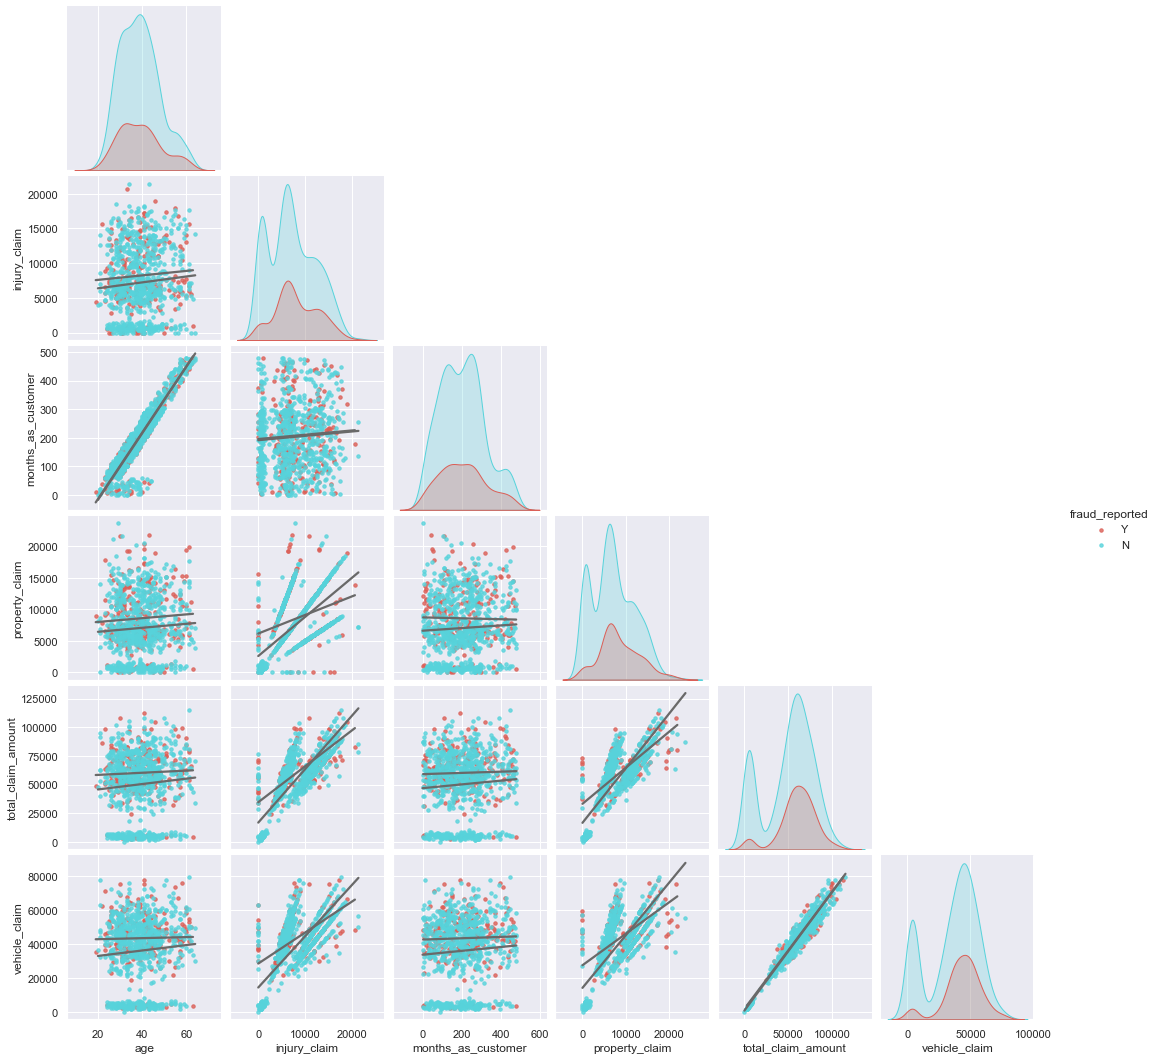

In [89]:
## Grafica de la correlacion de variables continuas con coeficientes superiores a 0.3 divididas por fraud_reported

sns.pairplot(insurance_claims, 
             corner = True,
             vars = ['age', 'injury_claim', 'months_as_customer', 'property_claim', 'total_claim_amount', 'vehicle_claim'], 
             diag_kind = 'kde', 
             diag_kws = {'color': 'g'}, 
             kind= 'reg', 
             hue = 'fraud_reported',
             palette = 'hls',
             plot_kws = {'ci': None, 'scatter_kws': {'s': 12}, 'line_kws': {'color': 'dimgray'}})

Finalmente, se dividieron las variables de edad, meses como cliente y montos de reclamación por la variable label, es decir, en casos en donde se reportó fraude y casos en los que no se reportó. Todo lo anterior con la finalidad de identificar si existía una correlación más evidente en los casos donde estuvo presente el fraude. Como se observa mediante los puntos marcados en rojo, la relación se hace mucho más difusa, pues los casos de fraude parece tener un comportamiento aleatorio y poco consistente.

<Figure size 1440x432 with 0 Axes>

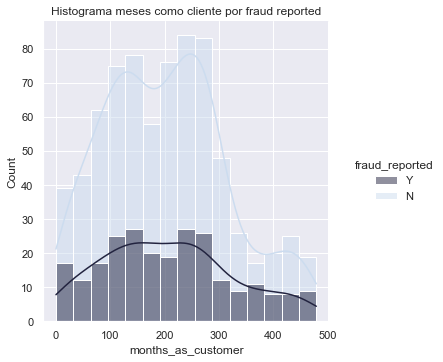

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,202.600266,113.574565,0.0,115.0,200.0,276.0,479.0
Y,247.0,208.080972,119.824064,3.0,116.0,199.0,279.0,478.0


In [48]:
## Distribución de meses como cliente dividida en fraude reportado

sns.set()
plt.figure(figsize=(20,6))
sns.displot(x = insurance_claims['months_as_customer'], data = insurance_claims, hue = insurance_claims['fraud_reported'], kde = True, palette = 'ch:s=.0,rot=-.1_r')
plt.title('Histograma meses como cliente por fraud reported')
plt.show()

insurance_claims.groupby('fraud_reported').months_as_customer.describe()

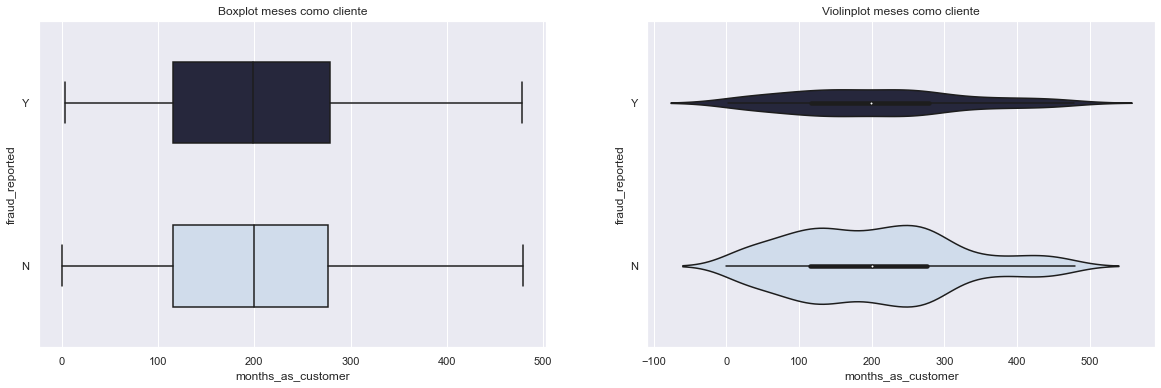

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,202.600266,113.574565,0.0,115.0,200.0,276.0,479.0
Y,247.0,208.080972,119.824064,3.0,116.0,199.0,279.0,478.0


In [49]:
## Boxplot, violinplot de meses como cliente dividida en fraude reportado

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x = insurance_claims['months_as_customer'], width = 0.5, fliersize = 4,  palette = 'ch:s=.0,rot=-.1_r', y = insurance_claims['fraud_reported'])
plt.title('Boxplot meses como cliente')

plt.subplot(1,2,2)
sns.violinplot(x = insurance_claims['months_as_customer'], width = 0.5, palette = 'ch:s=.0,rot=-.1_r', y = insurance_claims['fraud_reported'], scale = 'count')
plt.title('Violinplot meses como cliente')

plt.show()

insurance_claims.groupby('fraud_reported').months_as_customer.describe()

Al desagrupar la variable meses como cliente entre casos fraudulentos y casos en los que no existió fraude, se encuentra que la se mantiene una proporción y distribución similar para cada uno de los casos. Se observa además que las estadísticas de resumen de esta variable son se asemejan bastante, difiriendo unicamente en la cantidad de casos que tiene cada una de ellas, siendo no fraude la variable que más casos representa.
Si observamos más de cerca la distribución de fraude, se ve que con mayor frecuencia se presentan más casos de fraude entre los 100 meses y los 300 meses. Sin embargo, este mismo pico se ve en los casos de no fraude. Por medio del boxplot y el violinplot se ve que no existen datos atípicos dentro de esta variable.

<Figure size 1440x432 with 0 Axes>

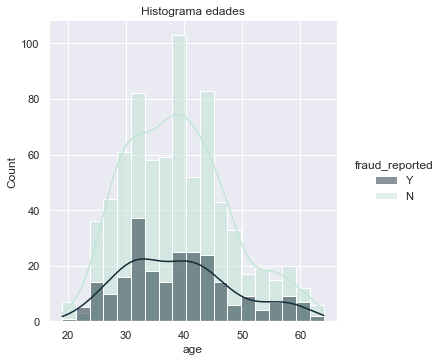

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,38.884462,8.973139,20.0,32.0,38.0,44.0,64.0
Y,247.0,39.141700,9.648295,19.0,32.0,38.0,45.0,63.0


In [50]:
## Distribución de Edad dividida en reporte de fraude

sns.set()
plt.figure(figsize=(20,6))
sns.displot(x = insurance_claims['age'], data = insurance_claims, kde = True, hue = insurance_claims['fraud_reported'], palette = 'ch:s=-.3,rot=-.2_r')
plt.title('Histograma edades')
plt.show()

insurance_claims.groupby('fraud_reported').age.describe()

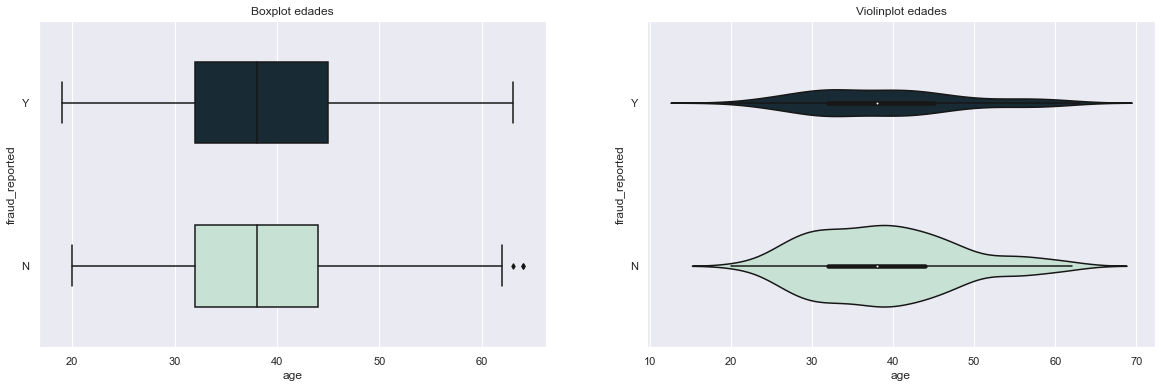

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,38.884462,8.973139,20.0,32.0,38.0,44.0,64.0
Y,247.0,39.141700,9.648295,19.0,32.0,38.0,45.0,63.0


In [51]:
## boxplot, violinplot de Edad dividida en reporte de fraude

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x = insurance_claims['age'], y = insurance_claims['fraud_reported'], width = 0.5, fliersize = 4, palette = 'ch:s=-.3,rot=-.2_r' )
plt.title('Boxplot edades')

plt.subplot(1,2,2)
sns.violinplot(x = insurance_claims['age'], y = insurance_claims['fraud_reported'], width = 0.5, fliersize = 4, palette = 'ch:s=-.3,rot=-.2_r', scale = 'count')
plt.title('Violinplot edades')

plt.show()

insurance_claims.groupby('fraud_reported').age.describe()

El comportamiento de fraude se comparó con la variable de edad del asegurado. Aquí se observa que la mayor frecuencia de las personas que reportan como fraude fueron de personas aseguradas de los 30 a los 32 años. Igual que la variable anterior, las estadísticas de resumen son muy similares en los casos en donde se presentó fraude y donde no, y de igual manera, los valores en donde no se presenta fraude sobrepasan los valores en donde si existió este hecho.

Por medio del boxplot se puede ver que la mediana es muy similar en la variable edad cuando se presenta el hecho o no, correspondiente a 38 años. Se observa además, que la categoría de no fraude presenta dos datos atípicos para esta variable. 

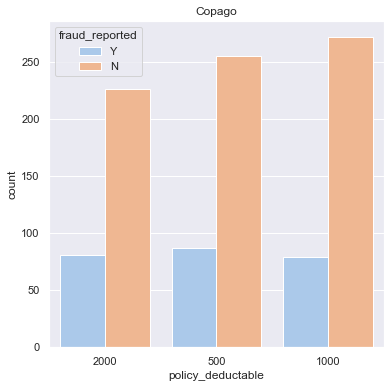

In [52]:
## Distribución de copago

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['policy_deductable'], data =insurance_claims, palette= 'pastel', order = insurance_claims.policy_deductable.value_counts().index[::-1], hue = insurance_claims['fraud_reported'])
plt.title('Copago')
plt.show()

Al comparar la variable reporte de fraude con la variable deducible de póliza, se puede observar que esta variable no tiene una incidencia o correlación mayor sobre el comisión de fraude, pues los casos se mantienen en el mismo rango a pesar del cambio del valor del copago que el asegurado debe pagar. Esto puede ser debido a que si un cliente se decide a hacer fraude, no le es de mayor importancia el copago que deba realizar para cometerlo. Sin embargo, existe una ligera mayor proporción de casos de fraude en comparación a no fraude en el copago de 2000. 

<Figure size 1440x432 with 0 Axes>

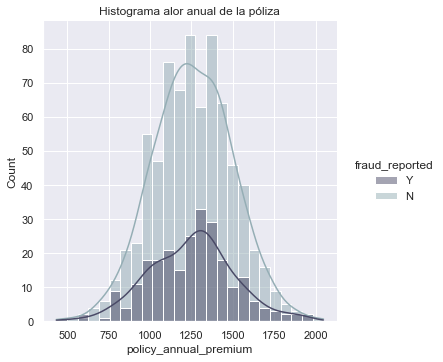

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1258.430000,241.247210,433.33,1097.640,1253.12,1422.56,2047.59
Y,247.0,1250.236275,253.263651,484.67,1062.615,1269.64,1396.33,1935.85


In [53]:
## Distribución de valor anual de la póliza dividida por fraud reported

sns.set()
plt.figure(figsize=(20,6))

sns.displot(x = insurance_claims['policy_annual_premium'], data = insurance_claims, hue = insurance_claims['fraud_reported'],  kde=True, palette = 'bone')
plt.title('Histograma alor anual de la póliza')
plt.show()

insurance_claims.groupby('fraud_reported').policy_annual_premium.describe()

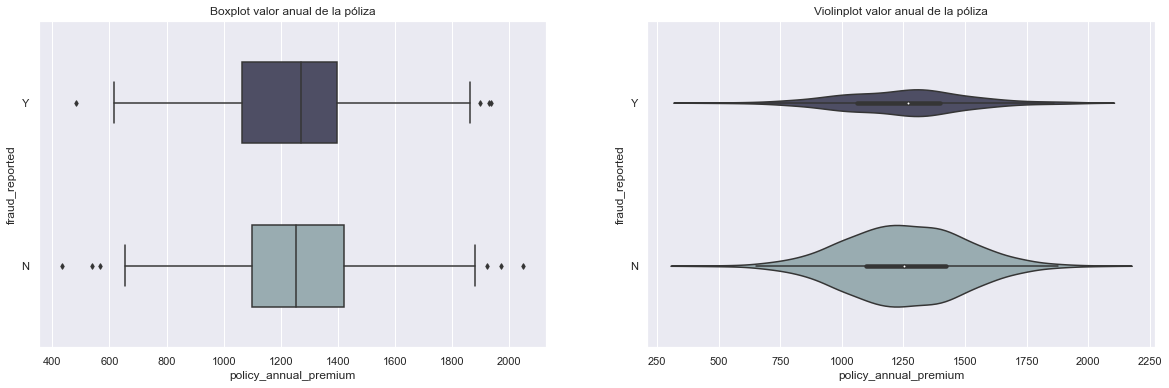

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1258.430000,241.247210,433.33,1097.640,1253.12,1422.56,2047.59
Y,247.0,1250.236275,253.263651,484.67,1062.615,1269.64,1396.33,1935.85


In [54]:
## violinplot, boxplot de valor anual de la póliza dividida por fraud reported

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x = insurance_claims['policy_annual_premium'], y = insurance_claims['fraud_reported'], width = 0.5, fliersize = 4, palette = 'bone')
plt.title('Boxplot valor anual de la póliza')

plt.subplot(1,2,2)
sns.violinplot(x = insurance_claims['policy_annual_premium'], y = insurance_claims['fraud_reported'], width = 0.5, fliersize = 4, palette = 'bone', scale = 'count')
plt.title('Violinplot valor anual de la póliza')

plt.show()

insurance_claims.groupby('fraud_reported').policy_annual_premium.describe()

Al revisar la prima de la póliza y por medio del histograma podemos observar que para valores de la prima anual de la póliza entre USD 1250 y USD 1270, se presenta los casos más frecuentes de reportes de fraude mientras que valores bajos de USD 500 a USD 770 y USD 1520 a USD 2000  son los menos frecuentes. 

Se observa que estas dos gráficas se ajustan a una normal, y que al contrastar con los casos que no fueron reportados como fraude este presenta una leve asimetrìa a la derecha en donde los casos más frecuentes están entre USD 1250-USD 1260 y USD 1270- USD 1280.

Se observa que para los dos casos, fraude como no fraude, se presentaron varios datos atípicos, siendo los más alejados del 1.5 el rango intercuartilico, los correspondientes a los que no cometieron ningún tipo de fraude. 

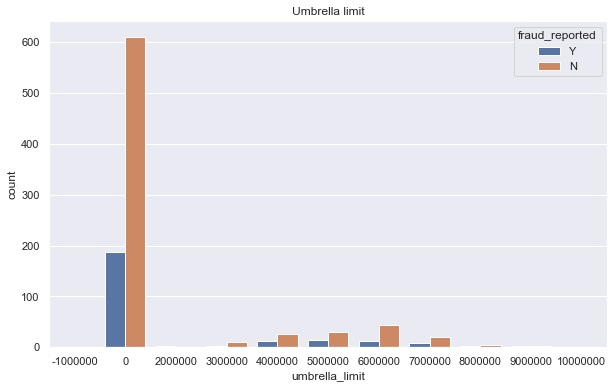

,umbrella_limit
count,1.000000e+03
mean,1.101000e+06
std,2.297407e+06
min,-1.000000e+06
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+07


In [55]:
## Distribución umbrella_limit

sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x = insurance_claims['umbrella_limit'], data = insurance_claims, palette = 'deep', hue = insurance_claims['fraud_reported'])
plt.title('Umbrella limit')
plt.show()

insurance_claims['umbrella_limit'].describe().to_frame()

Con respecto al límite de sombrilla, en el histograma se puede observar que se presenta mayor frecuencia de fraude cuando el límite fue USD 0, sin embargo, este dato coincide con el que más datos tiene para no fraude. Parece que esta variable no tiene gran incidencia o correlación en los casos reportados como fraudulentos.

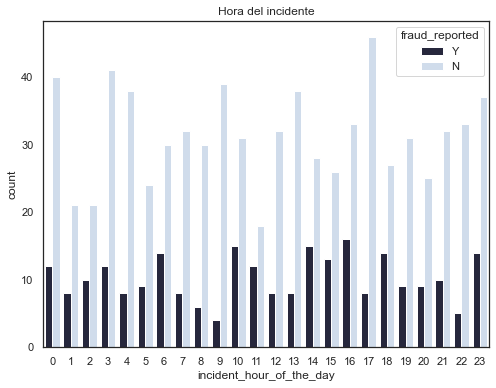

In [56]:
## Distribución de la hora del incidente

sns.set()
sns.set_style('white')
plt.figure(figsize=(8,6))
sns.countplot(x = insurance_claims['incident_hour_of_the_day'], data = insurance_claims, palette = 'ch:s=.0,rot=-.1_r', hue = insurance_claims['fraud_reported'])
plt.title('Hora del incidente')
plt.show()

Al evaluar las hora de día que sucedió el siniestro en la gráfica de barras, no se encuentra algun patrón que indique que la hora esté relacionada con el el reporte de fraude. Se puede observar que a las 16 horas se presentó la mayor frecuencia de casos de fraude y a las 9 la menor cantidad de casos. En el caso de los reportes que no fueron fraudes la mayor frecuencia es a las 17 horas y la menor frecuencia está a las 11 horas.

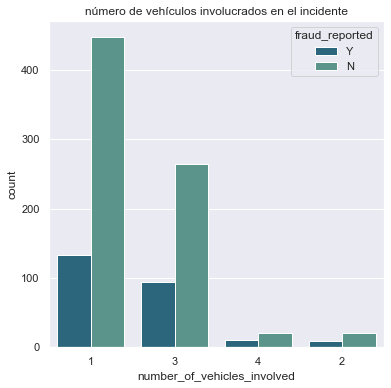

In [57]:
## Distribución del número de vehículos involucrados en el incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['number_of_vehicles_involved'], data = insurance_claims, palette='crest_r', order = insurance_claims.number_of_vehicles_involved.value_counts().index, hue = insurance_claims['fraud_reported'])
plt.title('número de vehículos involucrados en el incidente')
plt.show()

Mediante el gráfico de barras para la variable numero de vehiculos involucrados, se puede observar que los clientes que cometieron fraude, tienden a reportar un número de vehiculos involucrados de 1 o 3 carros, con lo que se ve que más de una persona se encuentra involucrada en este tipo de actos. Por otro lado, se ve que los casos que más datos tienen, tanto de fraude como no fraude es 1 o 3 vehiculos involucrados, por lo que puede ser un comportamiento aprendido por los defraudadores. Por otro lado, los menores casos se presentan cuando hay 4 o 2 vehículos involucrados. 

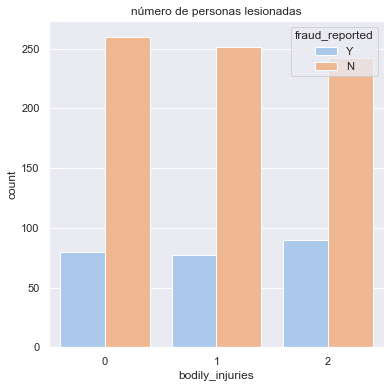

In [58]:
## Distribución del número de personas que sufrieron lesiones

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['bodily_injuries'], data = insurance_claims, palette = 'pastel', hue = insurance_claims['fraud_reported'])
plt.title('número de personas lesionadas')
plt.show()

Para la variable número de lesionados se observa que hay mayor proporción de casos de fraude para 2 lesionados en contraste con no fraude, sin embargo sus proporciones son muy similares a las que se presentan con 0 o 1 herido. Por tanto, esta variable no tiene una mayor incidencia o correlación sobre el comisión de fraude.

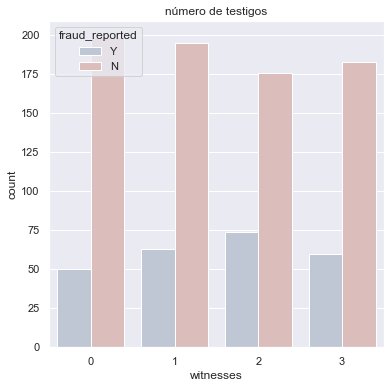

In [59]:
## Distribución de numero de testigos

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['witnesses'], data = insurance_claims, palette = 'vlag', hue = insurance_claims['fraud_reported'])
plt.title('número de testigos')
plt.show()

A medida que se incrementa el número de testigos, se observa en el gráfico de barras que aumenta el número de casos de fraude para 0, 1 y 2, lo que nos lleva a pensar que los clientes que incurren en esta actividad, y con el fin de hacer más creible el hecho, involucran a una o dos personas más, quienes pueden ser los complices para realizar el fraude. Se destaca la proporción que existe para 2 testigos, donde el 30% de los casos reportaron este valor.

<Figure size 1440x432 with 0 Axes>

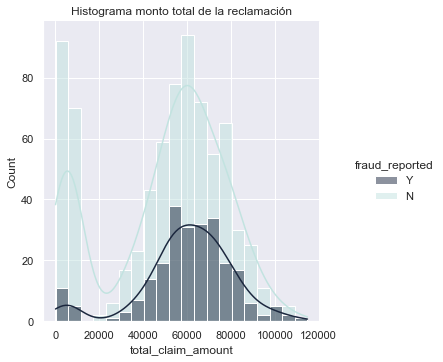

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,50288.605578,27575.191379,100.0,34650.0,56520.0,69480.0,114920.0
Y,247.0,60302.105263,20746.279567,2860.0,51910.0,61290.0,72665.0,112320.0


In [60]:
## Distribución del monto Total de la reclamación dividida por fraud reported

sns.set()
plt.figure(figsize=(20,6))

sns.displot(x = insurance_claims['total_claim_amount'], data = insurance_claims, hue = insurance_claims['fraud_reported'], kde = True, palette = 'ch:s=-.1,rot=-.2_r')
plt.title('Histograma monto total de la reclamación')
plt.show()

insurance_claims.groupby('fraud_reported').total_claim_amount.describe()

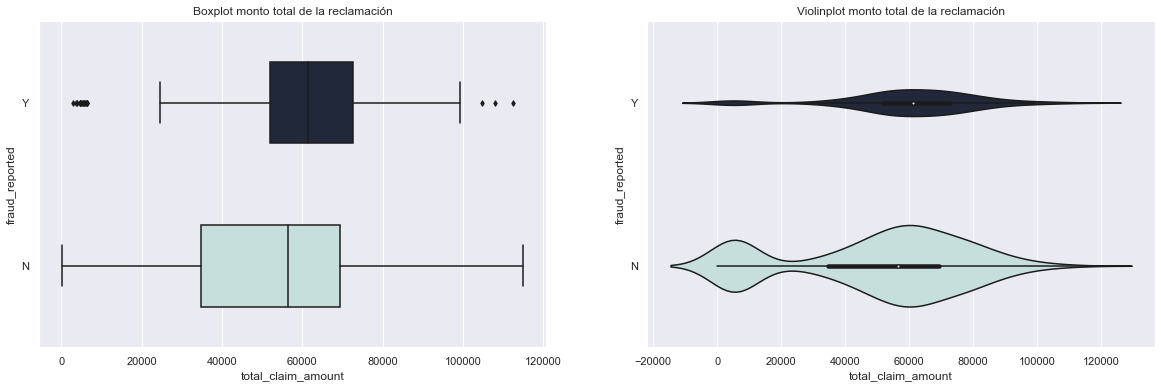

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,50288.605578,27575.191379,100.0,34650.0,56520.0,69480.0,114920.0
Y,247.0,60302.105263,20746.279567,2860.0,51910.0,61290.0,72665.0,112320.0


In [61]:
## boxplot, violinplot del monto Total de la reclamación dividida por fraud reported

sns.set()
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(x = insurance_claims['total_claim_amount'], y = insurance_claims['fraud_reported'], width = 0.5, fliersize = 4, palette = 'ch:s=-.1,rot=-.2_r')
plt.title('Boxplot monto total de la reclamación')

plt.subplot(1,2,2)
sns.violinplot(x = insurance_claims['total_claim_amount'], y = insurance_claims['fraud_reported'], width = 0.5, palette = 'ch:s=-.1,rot=-.2_r', scale = 'count')
plt.title('Violinplot monto total de la reclamación')

plt.show()

insurance_claims.groupby('fraud_reported').total_claim_amount.describe()

Al revisar el histograma de la variable monto total de la reclamación, se observa que los valores de fraude y no fraude presentan una distribución similar, la cual se parece a una normal, observandose los mismos picos y los mismos valles en la variable, indicando que los defraudadores y no defraudadores ubican sus reclamaciones en los puntos intermedios, es decir entre USD 40000 y USD 70000.

Sin embargo, al revisar el boxplot y violinplot discriminado por comisión y no comisión de fraude, podemos observar que existe una tendencia de las personas fraudulentas a hacer reclamaciones por valores superiores a los que reclamaría o reclamó una persona que no cometió fraude, esto se ve claramente en la los valores de los percentiles 25, 50 y 75, donde se ve que sus valores son sobrepasan los valores de reclamación que se hicieron por parte de las personas que no cometieron fraude.

Adicional a lo anterior, parece que los defraudadores tienen una tendencia a ubicar sus reclamaciones en montos centrales, pues se ve que la gran mayoría de los datos se ubican entre los USD 22000 y USD 100000, lo cual podría estar dado por un pensamiento de no levantar sospechas que conlleven a futuras investigaciones por hacer reclamaciones por valores excesivamente altos, ni su interés en hacer fraude en reclamaciones por valores excesivamente bajos.

A pesar de lo anterior, también se ve que hay 3 puntos atípicos, de clientes que hicieron reclamaciones por montos superiores a los USD 100000, y varios que lo hicieron por montos inferiores a los USD 10000

In [62]:
## Nuevo dataset con el monto de reclamaciones desagrupado

monto_reclamacion = pd.read_csv('Dataset/monto reclamacion desagrupado.csv')

<Figure size 720x720 with 0 Axes>

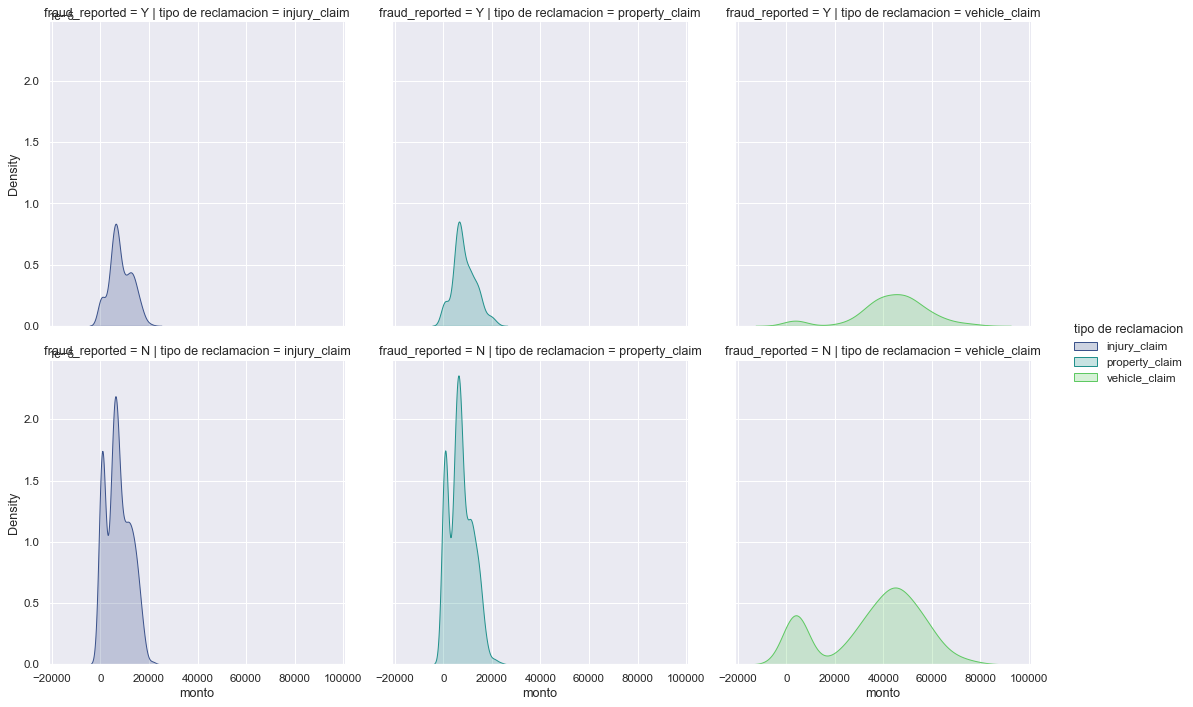

In [63]:
## Distribucion de monto de reclacion desagrupado en reclamacion por lesiones, propiedad, vehiculo

sns.set(font_scale = 1.05)
plt.figure(figsize=(10,10))
sns.displot(x = monto_reclamacion['monto'], data = monto_reclamacion, row = monto_reclamacion['fraud_reported'], col = monto_reclamacion['tipo de reclamacion'], hue = monto_reclamacion['tipo de reclamacion'], palette = 'viridis', kind = 'kde', fill = True)

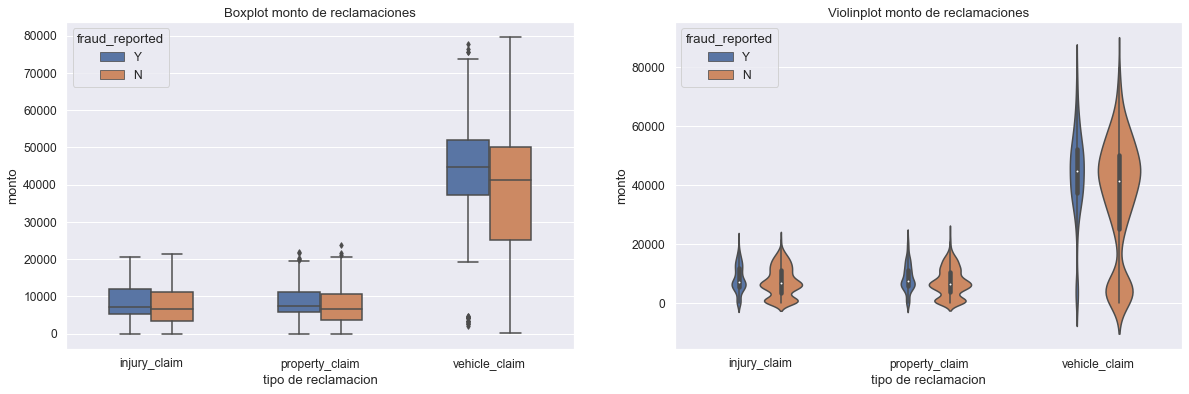

count          mean           std     min  \
tipo de reclamacion fraud_reported                                              
injury_claim        N               753.0   7179.229748   4961.204029     0.0   
                    Y               247.0   8208.340081   4550.307780     0.0   
property_claim      N               753.0   7018.884462   4828.915463     0.0   
                    Y               247.0   8560.121457   4631.741098     0.0   
vehicle_claim       N               753.0  36090.491368  19698.046058    70.0   
                    Y               247.0  43533.643725  14849.388907  2080.0   

                                        25%      50%      75%      max  
tipo de reclamacion fraud_reported                                      
injury_claim        N                3480.0   6620.0  11120.0  21450.0  
                    Y                5370.0   7240.0  11900.0  20700.0  
property_claim      N                3720.0   6560.0  10600.0  23670.0  
                    Y                5815.0   7440.0  11300.0  21810.0  
vehicle_claim       N               25200.0  41220.0  49980.0  79560.0  
                    Y               37170.0  44800.0  52080.0  77760.0

In [64]:
## Distribucion de monto de reclacion por lesiones, propiedad, vehiculo

sns.set(font_scale = 1.1)
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.boxplot(y = monto_reclamacion['monto'], x = monto_reclamacion['tipo de reclamacion'], hue = monto_reclamacion['fraud_reported'], data = monto_reclamacion,  width = 0.5, fliersize = 4)
plt.title('Boxplot monto de reclamaciones')

plt.subplot(1,2,2)
sns.violinplot(y = monto_reclamacion['monto'], x = monto_reclamacion['tipo de reclamacion'], hue = monto_reclamacion['fraud_reported'], data = monto_reclamacion,  width = 0.5, fliersize = 4, scale = 'count', scale_hue = False)
plt.title('Violinplot monto de reclamaciones')

plt.show()

monto_reclamacion.groupby(['tipo de reclamacion', 'fraud_reported']).monto.describe()

Al igual que el análisis que se vio en la variable monto total de la reclamación, podemos observar que en su desagrupación por montos de reclamación por lesiones, propiedad y vehículo, presentan el mismo comportamiento que la variable que los agrupa. Se puede apreciar aquí, que los defraudadores tienden a hacer reclamaciones por montos superiores a los no defraudadores, esto se observa claramente en el violinplot y el boxplot de cada una de estas variables, donde se ve que los montos reclamados en los quantiles 25, 50 y 75 para los defraudadores son superiores a sus contrapartes que no cometen este acto.

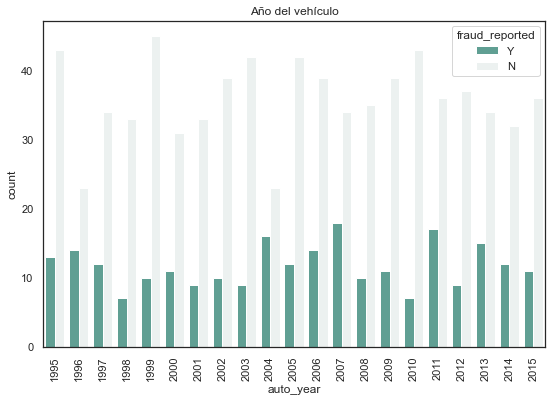

In [65]:
## Distribución del año del vehículo

sns.set()
sns.set_style('white')
plt.figure(figsize=(9,6))
sns.countplot(x = insurance_claims['auto_year'], data = insurance_claims, palette = 'light:#5A9_r', hue = insurance_claims['fraud_reported'])
plt.xticks(rotation = 90)
plt.title('Año del vehículo')
plt.show()

Se observa mediante el gráfico de barras que la variable año del vehículo parece no tener una mayor incidencia o correlación en el comisión de fraude, dado que no es posible identificar un patrón claro que asocie el año del vehículo con el comisión de fraude. Se observa que los vehículos de los año 2004, 2007, 2011 fueron los que más se usaron para cometer este tipo de actos, y que puntualmente los vehículos del año 2004 tienen una gran proporción de hechos fraudulentos con respecto a su contraparte de no comisión de fraude, sin embargo, esta conclusión no se puede generalizar a otros datasets dado que el fraude puede ser cometido con cualquier tipo de vehículo independientemente del año.

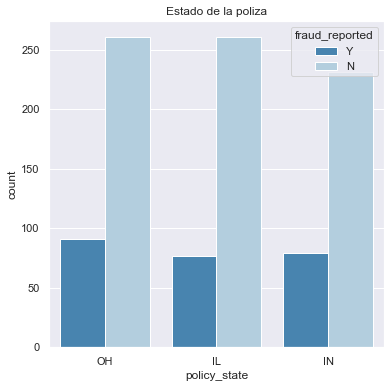

In [66]:
## Distribución de Estado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['policy_state'], data = insurance_claims, palette = 'Blues_r', order = insurance_claims.policy_state.value_counts().index, hue = insurance_claims['fraud_reported'])
plt.title('Estado de la poliza')
plt.show()

Para la variable estado donde se aquirió la póliza, parece no existir una relación entre la variable y el comisión de fraude, se observa que se presentan igual cantidad de fraudes por parte de las personas que compraron sus pólizas en los estados de Ohio, Ilinois, e Indiana. De igual manera se ve que la cantidad de clientes sobre los cuales no se reportó fraude, es igual para los tres estados, y que mantienen la misma proporción de fraude y no fraude entre los distintos estados.

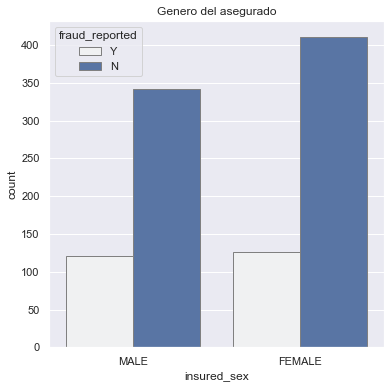

In [67]:
## Distribución de genero del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['insured_sex'], data = insurance_claims, palette = 'light:b', ec='gray', hue = insurance_claims['fraud_reported'])
plt.title('Genero del asegurado')
plt.show()

Para la variable género, al igual que las anteriores variables, parece no tener gran incidencia o correlación sobre la comisión de fraude, pues la cantidad de personas que cometieron fraude del género másculino es muy similar a la cantidad de clientes que lo realizaron del género femenino. Como se había observado anteriormente, parece que las mujeres son más proclives a asegurarse ante contingencias relacionadas a incidentes que involucren su automovil. Debido a lo anterior, la proporción de hombres que cometen fraude, es superior a la proporción de mujeres que lo realizan, sin embargo este dado solamente se está dando debido a que las mujeres tienen una mayor participación en la adquisición de una póliza para su vehículo

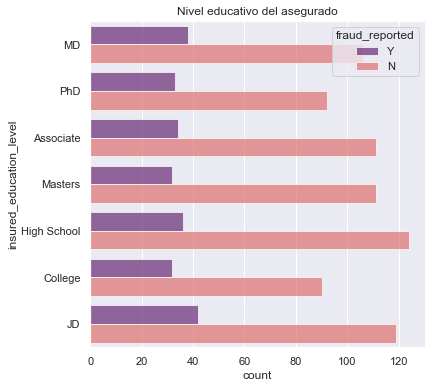

In [68]:
## Distribución del nivel educativo del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_education_level'], data = insurance_claims, hue = insurance_claims['fraud_reported'], palette = 'magma', alpha= 0.7)
plt.title('Nivel educativo del asegurado')
plt.show()

La variable nivel educativo del asegurado, parece no tener una mayor incidencia o correlación con la comisión de fraude, mediante la gráfica de barras se puede observar que las personas que más cometieron este acto fueron los doctores en jurisprudencia, seguidos de los doctores en medicina, sin embargo esta relación es proporcional a los casos en los que no se realizaron estas reclamaciones fraudulentas, por lo que esta varía podría explicar poco la comisión o no de fraude.

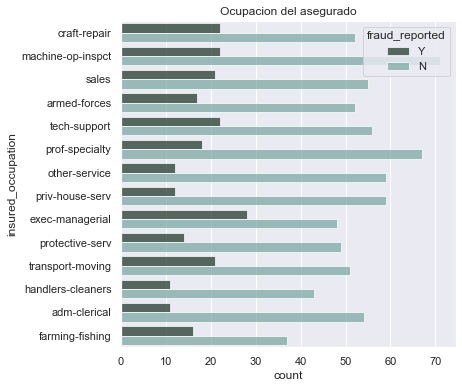

In [69]:
## Distribución del ocupacion del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_occupation'], data = insurance_claims, palette = 'ch:2,r=.2,l=.6_r', hue = insurance_claims['fraud_reported'], alpha = 0.7)
plt.title('Ocupacion del asegurado')
plt.show()

La variable ocupación del asegurado, parece tener una incidencia o correlación media con el reporte de fraude, pues se observa que la profesión de executive managerial tiene una alta indice de fraude llegando a ser el 37.5% de los casos en los que es reportó fraude. El resto de categorias, parece tener una incidencia baja sobre el fraude, pues mantienen proporciones similares con no fraude a través de la gráfica

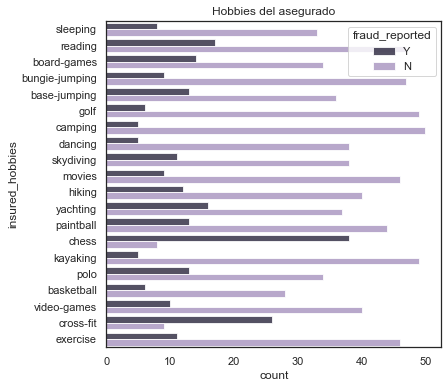

In [70]:
## Distribución del hobbies del asegurado

sns.set()
sns.set_style('white')
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_hobbies'], data = insurance_claims, palette = 'ch:3,r=.1,l=.6_r', hue = insurance_claims['fraud_reported'], alpha = 0.8)
plt.title('Hobbies del asegurado')
plt.show()

Los hobbies que reportó el asegurado tiene una alta incidencia o correlación con la comisión de fraude, especificamente en dos de sus valores. Se observa mediante esta gráfica de barras que los clientes que mostraron como hobbies el ajedrez y cross fit, tienen un alto porcentaje de comisión de fraude, inclusive llegando a ser las reclamaciones por parte de defraudadores superiores a los no defraudadores para estos dos hobbies. Se observa que el 80% de las personas que tienen como hobby el ajedrez, y que el 71% de los que practican cross-fit llegaron a cometer fraude. Por el resto de categorías, parece que se mantienen las proporciones de fraudulentos y no fraudulentos a través de los diferentes hobbies.

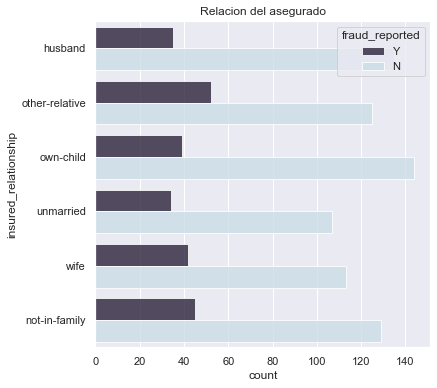

In [71]:
## Distribución del relacion del asegurado

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['insured_relationship'], data = insurance_claims, palette = 'ch:s=.25,rot=-.25_r', hue = insurance_claims['fraud_reported'], alpha = 0.8)
plt.title('Relacion del asegurado')
plt.show()

Al revisar la variable relación con el beneficiario, no se observa ninguna correlación o incidencia en la comisión o no de actos fraudulentos. Se ve que cuando un cliente tiene como beneficiario a un familiar distinto a los padres, esposo o esposa, su incidencia de fraude es más común, pues su proporción es la más alta a través de las categorias llegando a ser del 26% los casos donde se comete fraude. Se ve que para el resto de categorías, la proporción de comisión de fraude no es muy alta con respecto a la no comisión.

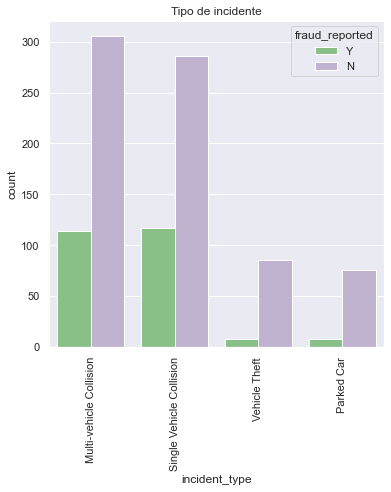

In [72]:
## Distribución del Tipo de incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['incident_type'], data = insurance_claims, palette = 'Accent', order = insurance_claims.incident_type.value_counts().index, hue = insurance_claims['fraud_reported'])
plt.xticks(rotation = 90)
plt.title('Tipo de incidente')
plt.show()

Al revisar la variable tipo de incidente, se ve que esta tiene gran correlación con la comisión de fraude, observandose que los clientes que cometieron fraude, tienden a hacer el fraude con incidente de multiple colision de vehiculos y colisión con un solo vehículo, se ve que sus proporciones son de aproximadamente el 26% de los casos. en contraste menos del 10% de los casos reportados como fraude corresponden a robo de vehículo o incidente al encontrarse parqueado.

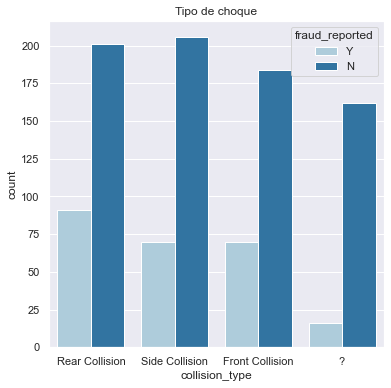

In [73]:
## Distribución del Tipo de choque

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['collision_type'], data = insurance_claims, palette = 'Paired', order = insurance_claims.collision_type.value_counts().index, hue = insurance_claims['fraud_reported'])
plt.xticks(rotation = 0)
plt.title('Tipo de choque')
plt.show()

La variable tipo de colisión parece no mostrar gran incidencia o correlación con el hecho de que se reporte o no fraude. Se observa que para las colisiones en el frente, trasera y costado, la relación de fraude es de aproximadamente el 27%, incrementando o disminuyendo en proporción a los casos en los que no se cometió fraude. Se observa además, que en los datos en donde no se reportó el tipo de colisión o los datos faltantes, la proporción de fraude disminuye al 11%, lo que indicaría que los defraudadores prefieren reportar esta variable para evitar se investigue su caso.

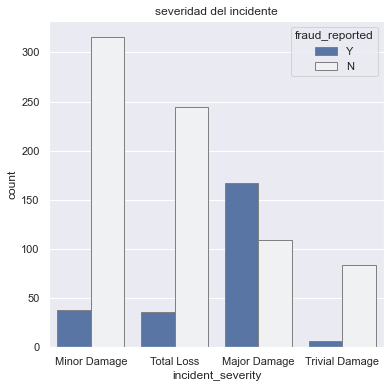

In [74]:
## Distribución del severidad del incidente

sns.set()
sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['incident_severity'], data = insurance_claims, palette = 'light:b_r', order = insurance_claims.incident_severity.value_counts().index, ec = 'gray', hue = insurance_claims['fraud_reported'])
plt.title('severidad del incidente')
plt.show()

La variable severidad del incidente es una variable que podría llegar a explicar en gran medida la comisión de fraude, dado que tiene tiene categorias que correlacionan fuertemente con la comisión del fraude. Especificamente, se observa que los defraudadores reportan en esta variable la existencia de un daño mayor, al menos en este dataset, llegando a ser la cantidad de personas que cometieron fraude superiores a los que no con una proporción de 62% contra el 38%. Esta variable, al igual que monto de la reclamación, muestra que los defraudadores prefieren apuntar por los valores medios-altos, con el fin de no levantar sospecha que lleven a investigaciones en caso que lo hicieran por incidentes de severidad de grado de perdida total, pero tampoco tienen interés en reclamaciones de daños triviales o menores, lo cual se logra observar en las proporciones que tienen los defraudadores contra los casos legítimos en este tipo de daño donde no alcanza a superar el 15%.

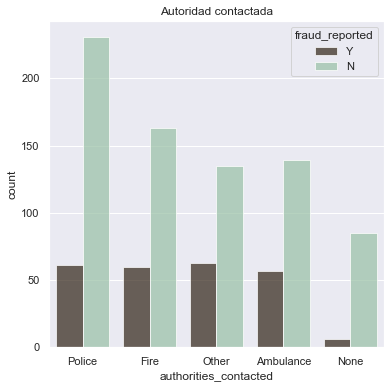

In [75]:
## Distribución del Autoridad contactada

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['authorities_contacted'], data = insurance_claims, palette = 'ch:1,r=.5,l=.7_r', order = insurance_claims.authorities_contacted.value_counts().index, hue = insurance_claims['fraud_reported'], alpha = 0.7)
plt.title('Autoridad contactada')
plt.show()

Por medio de la variable autoridades contactadas, se ve que los clientes que cometen fraude tienden a contactar a la policia, ambulancia, bomberos y otros en la misma medida, con reporte de aproximadamente 60 defraudadores que lo hicieron en cada caso. Se ve por otro lado, que los clientes con reclamaciones legítimas son más proclives a contactar a la policía o a los bomberos para este tipo de incidentes, y que la proporción de personas fraudulentas que contactan a la policía y a los bomberos no es tan alta como lo es en sus contrapartes legítimas.

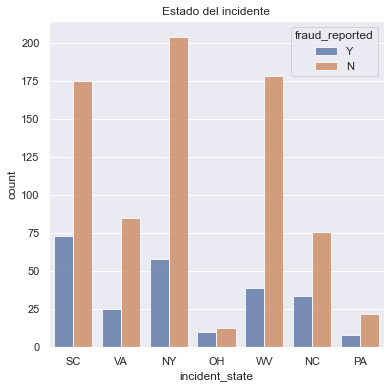

In [76]:
## Distribución del Estado del incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['incident_state'], data = insurance_claims, hue = insurance_claims['fraud_reported'], alpha = 0.8)
plt.title('Estado del incidente')
plt.show()

La variable estado donde ocurrió el incidente es una variable que ayuda a determinar en una pequeña medida si existió fraude o no para este dataset. Puntualmente, en la categoría de Ohio se observa una alta proporción de personas que cometieron fraude en comparación con las que no, siendo cerca del 45% vs el 55% correspondientemente. Por otro lado, se observa que el estado en donde más casos de fraude se cometieron, es el estado de South Carolina en donde cercan de 75 de las reclamaciones fueron fraudulentas.

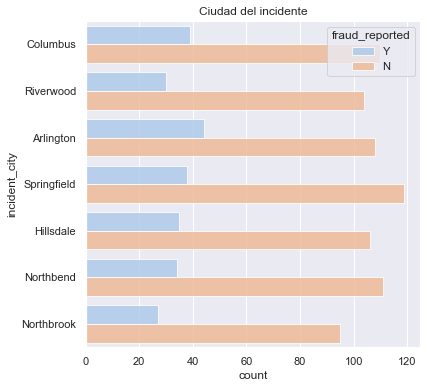

In [77]:
## Distribución del ciudad del incidente

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['incident_city'], data = insurance_claims, hue = insurance_claims['fraud_reported'], palette = 'pastel', alpha = 0.8)
plt.title('Ciudad del incidente')
plt.show() 

La viariable ciudad del incidente parece ser una variable que no aporta mayor información respecto a la comisión o no de fraude. Se ve que en la mayoría de categorias la proporción de reclamaciones fraudulentas y reclamaciones legítimas se mantiene en las diferentes ciudades, siendo esta de 20 a 80, respectivamente.  Se observa además, que la variable tiene información muy similar a la que nos entregaba la variable Estado del incidente, siendo esta última una variable que agrupa las ciudades, es decir las subcategorias de esta.

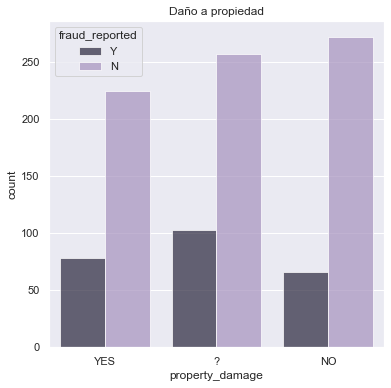

In [78]:
## Distribución del daño a propiedad

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['property_damage'], data = insurance_claims, palette = 'ch:3,r=.1,l=.6_r', hue = insurance_claims['fraud_reported'], alpha = 0.7)
plt.title('Daño a propiedad')
plt.show() 

Como se observa en el gráfico de barras para la variable daño a propiedad, existe una gran proporción de reclamaciones que tienen valores faltantes en este dataset y que fueron llenados con el caracter (?). Para los valores en donde se llenó esta variable, se observa que el valor que más se presenta casos fraudulentos es cuando hubo daño a propiedad, representando los hechos fraudulentos un 20%, mientras que en el caso en que hubo ausencia de daños, este porcentaje representa el 17% de los casos. Lo anterior puede ser explicado porque los clientes que incurren en estos actos informan en los hechos de lo sucedido el daño a propiedad con el propósito de no levantar sospechas.

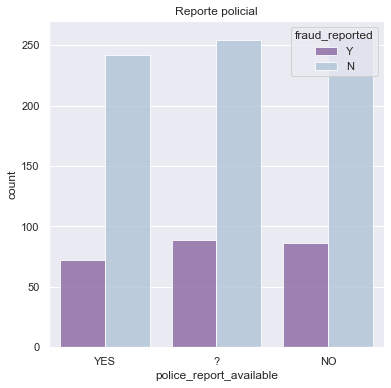

In [79]:
## Distribución del reporte policial

sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = insurance_claims['police_report_available'], data = insurance_claims,  palette = 'BuPu_r', hue = insurance_claims['fraud_reported'], alpha = 0.8)
plt.title('Reporte policial')
plt.show() 

En la variable reporte policial disponible, ocurre el mismo fenómeno que la variable anterior, en el cual existe muchos datos que no fueron suministrados. Sin embargo, se observa que la proporción de reclamaciones fraudulentas y reclamaciones legítimas se mantiene en los tres valores, y en la cual es de aproximadamente 20 a 80 respectivamente. Si observamos esta variable a nivel más general, sin observar su desagregado por la comisión o no de fraude, vemos que los casos en donde existe este reporte policial es mucho menor a los casos en donde no existe o se desconoce la existencia del mismo.

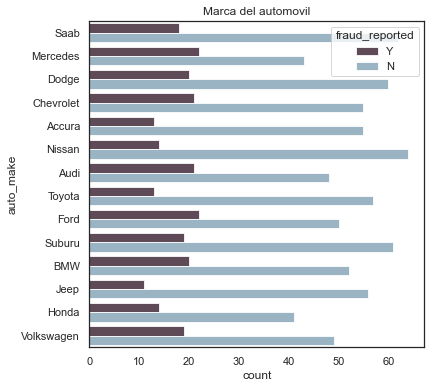

In [80]:
## Distribución del marca del automovil

sns.set()
sns.set_style('white')
plt.figure(figsize=(6,6))
sns.countplot(y = insurance_claims['auto_make'], data = insurance_claims, palette = 'ch:start=.9,rot=-.7,l=.6_r', hue = insurance_claims['fraud_reported'], alpha = 0.8)
plt.title('Marca del automovil')
plt.show() 

En el gráfico de barras para la variable marca de automóvil, se observa que la variable no tiene gran incidencia o correlación con la comisión o no de fraude, pues se puede observar que los clientes que cometieron fraude, no tiene algun patrón con el tipo de automovil, lo cual es de esperarse, pues los actos fraudulentos pueden ser efectuados por cualquier tipo de automovil, sin importar la marca. Se puede observar que Ford es la marca con mayor frecuencia de casos de fraude, pero esta a su vez es una de las marcas más vendidas en los Estados Unidos, y la marca de vehículo Jeep es la menor. En el caso de los asegurados que no cometieron fraude en contraste a los que si, se observa que la marca que menos frecuentemente cometieron fraude es Nissan. 